In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
keras = tf.keras
from scipy import stats
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.titlesize'] = 'large'

In [44]:
X_train = pd.read_csv('../data/train_clean.csv', index_col='Date').drop(columns='Unnamed: 0')
X_test = pd.read_csv('../data/test_clean.csv', index_col='Date').drop(columns='Unnamed: 0')

In [49]:
X_train

Temperature  Fuel_Price       CPI  Unemployment      Size  \
Date                                                                    
2010-02-05    -0.956241   -1.694130  1.003435      0.167116  0.347697   
2010-02-05    -2.720238   -1.220483 -1.050775      0.403089  0.367559   
2010-02-05    -0.308472   -0.838934 -1.182076      1.191929 -0.063524   
2010-02-05    -0.755395   -1.694130  1.089367     -0.288768  1.279197   
2010-02-05    -2.168854   -1.676587  0.442830     -0.492001 -1.212729   
...                 ...         ...       ...           ...       ...   
2012-10-26    -0.134011    1.255199 -0.864887      0.812644 -0.608557   
2012-10-26    -0.706395    1.255199 -0.864887     -0.430846  0.367559   
2012-10-26    -0.512010    1.255199 -0.864887     -2.279709 -0.262129   
2012-10-26    -0.114088    0.371497 -1.059419      0.619912  0.460420   
2012-10-26    -0.065626    1.178451  0.518401      0.513663 -0.200984   

            Type_x0_A  Type_x0_B  Type_x0_C  Month_x0_1  Month_x0_2  \
Date                                                                  
2010-02-05        1.0        0.0        0.0         0.0         1.0   
2010-02-05        1.0        0.0        0.0         0.0         1.0   
2010-02-05        0.0        1.0        0.0         0.0         1.0   
2010-02-05        1.0        0.0        0.0         0.0         1.0   
2010-02-05        0.0        1.0        0.0         0.0         1.0   
...               ...        ...        ...         ...         ...   
2012-10-26        0.0        1.0        0.0         0.0         0.0   
2012-10-26        1.0        0.0        0.0         0.0         0.0   
2012-10-26        0.0        1.0        0.0         0.0         0.0   
2012-10-26        1.0        0.0        0.0         0.0         0.0   
2012-10-26        0.0        1.0        0.0         0.0         0.0   

            Month_x0_3  Month_x0_4  Month_x0_5  Month_x0_6  Month_x0_7  \
Date                                                                     
2010-02-05         0.0         0.0         0.0         0.0         0.0   
2010-02-05         0.0         0.0         0.0         0.0         0.0   
2010-02-05         0.0         0.0         0.0         0.0         0.0   
2010-02-05         0.0         0.0         0.0         0.0         0.0   
2010-02-05         0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
2012-10-26         0.0         0.0         0.0         0.0         0.0   
2012-10-26         0.0         0.0         0.0         0.0         0.0   
2012-10-26         0.0         0.0         0.0         0.0         0.0   
2012-10-26         0.0         0.0         0.0         0.0         0.0   
2012-10-26         0.0         0.0         0.0         0.0         0.0   

            Month_x0_8  Month_x0_9  Month_x0_10  Month_x0_11  Month_x0_12  \
Date                                                                        
2010-02-05         0.0         0.0          0.0          0.0          0.0   
2010-02-05         0.0         0.0          0.0          0.0          0.0   
2010-02-05         0.0         0.0          0.0          0.0          0.0   
2010-02-05         0.0         0.0          0.0          0.0          0.0   
2010-02-05         0.0         0.0          0.0          0.0          0.0   
...                ...         ...          ...          ...          ...   
2012-10-26         0.0         0.0          1.0          0.0          0.0   
2012-10-26         0.0         0.0          1.0          0.0          0.0   
2012-10-26         0.0         0.0          1.0          0.0          0.0   
2012-10-26         0.0         0.0          1.0          0.0          0.0   
2012-10-26         0.0         0.0          1.0          0.0          0.0   

            Store  IsHoliday  Weekly_Sales  
Date                                        
2010-02-05      1      False    1643690.90  
2010-02-05     26      False    103411

In [46]:
X_train.index = pd.to_datetime(X_train.index)
X_test.index = pd.to_datetime(X_test.index)

In [48]:
X_train.sort_index(inplace=True)
X_test.sort_index(inplace=True)

In [51]:
piv_train = X_train[['Store', 'Weekly_Sales']].pivot_table('Weekly_Sales', X_train.index,'Store')
# piv_train.dropna(inplace=True, axis=1, thresh=123)
# piv_train.fillna(0, inplace=True)
piv_test = X_test[['Store', 'Weekly_Sales']].pivot_table('Weekly_Sales', X_test.index,'Store')
# piv_test.dropna(inplace=True, axis=1, thresh=123)
# piv_test.fillna(0, inplace=True)
piv_train

Store               1           2           4           6          7   \
Date                                                                    
2010-02-05  1643690.90  2136989.46  2135143.87  1652635.10  496725.44   
2010-02-12  1641957.44  2137809.50  2188307.39  1606283.86  524104.92   
2010-02-19  1611968.17  2124451.54  2049860.26  1567138.07  506760.54   
2010-02-26  1409727.59  1865097.27  1925728.84  1432953.21  496083.24   
2010-03-05  1554806.68  1991013.13  1971057.44  1601348.82  491419.55   
...                ...         ...         ...         ...        ...   
2012-09-28  1437059.26  1746470.56  2027620.23  1369131.46  525545.76   
2012-10-05  1670785.97  1998321.04  2209835.43  1518177.71  505830.56   
2012-10-12  1573072.81  1900745.13  2133026.07  1459396.84  503463.93   
2012-10-19  1508068.77  1847990.41  2097266.85  1436883.99  516424.83   
2012-10-26  1493659.74  1834458.35  2149594.46  1431426.34  495543.28   

Store               8          9           10          11          13  \
Date                                                                    
2010-02-05  1004137.09  549505.55  2193048.75  1528008.64  1967220.53   
2010-02-12   994801.40  552677.48  2176028.52  1574684.08  2030933.46   
2010-02-19   963960.37  511327.90  2113432.58  1503298.70  1970274.64   
2010-02-26   847592.11  473773.27  2006774.96  1336404.65  1817850.32   
2010-03-05   881503.95  507297.88  1987090.09  1426622.65  1939980.43   
...                ...        ...         ...         ...         ...   
2012-09-28   884724.41  516361.06  1694862.41  1227430.73  1927664.11   
2012-10-05   976436.02  606755.30  1758971.38  1422794.26  2041918.74   
2012-10-12   927511.99  558464.80  1713889.11  1311965.09  1999079.44   
2012-10-19   900309.75  542009.46  1734834.82  1232073.18  2018010.15   
2012-10-26   891671.44  549731.49  1744349.05  1200729.45  2035189.66   

Store               14         15         16         17          18  \
Date                                                                  
2010-02-05  2623469.95  652122.44  477409.30  789036.02  1205307.50   
2010-02-12  1704218.84  682447.10  472044.28  841951.91  1187880.70   
2010-02-19  2204556.70  660838.75  469868.70  800714.00  1150663.42   
2010-02-26  2095591.63  564883.20  443242.17  749549.55  1068157.45   
2010-03-05  2237544.75  605325.43  444181.85  783300.05  1179738.50   
...                ...        ...        ...        ...         ...   
2012-09-28  1522512.20  553901.97  469607.73  972716.24  1002856.20   
2012-10-05  1687592.16  573498.64  471281.68  952609.17  1092204.79   
2012-10-12  1639585.61  551799.63  491817.19  919878.34  1074079.00   
2012-10-19  1590274.72  555652.77  577198.97  957356.84  1048706.75   
2012-10-26  1704357.62  558473.60  475770.14  943465.29  1127516.25   

Store               19          20         21          22          23  \
Date                                                                    
2010-02-05  1507637.17  2401395.47  798593.88  1033017.37  1364721.58   
2010-02-12  1536549.95  2109107.90  809321.44  1022571.25  1380892.08   
2010-02-19  1515976.11  2161549.76  867283.25   988467.61  1319588.04   
2010-02-26  1373270.06  1898193.95  749597.24   899761.48  1198709.65   
2010-03-05  1495844.57  2119213.72  747444.32  1009201.24  1311175.93   
...                ...         ...        ...         ...         ...   
2012-09-28  1338299.02  2008350.58  647097.65   976479.51  1319035.06   
2012-10-05  1408016.10  2246411.89  651768.91  1009887.36  1464616.59   
2012-10-12  1352809.50  2162951.36  653043.44  1004039.84  1412925.25   
2012-10-19  1321102.35  1999363.49  641368.14   978027.95  1363155.77   
2012-10-26  1322117.96  2031650.55  675202.87  1094422.69  1347454.59   

Store               26         29         30          32         33  \
Date                                                                  
2010-02-05  1034119.21  538634.46  465108.52  1087616.19  274593.43   
2010-02-12  1

In [52]:
def windowize_data(data, n_prev, n_future):
    '''
    returns:
        x: np array with shape (n_predictions, n_prev, 1)
        y: np array with shape (n_predictions, n_future, 1)
    '''
    n_predictions = len(data) - n_prev - n_future +1
    y = data[n_prev:]
    dates = data.index[n_prev:]
#     print(dates[:5])
    # this might be too clever
    y_indices = np.arange(n_future) + np.arange(n_predictions)[:, None]
    y = y[y_indices, None]
    y_dates = dates[y_indices, None]
    x_indices = np.arange(n_prev) + np.arange(n_predictions)[:, None]
    x = data[x_indices, None]
    return x, y, y_dates

def window_multi_groups(data, n_prev, n_future):
    '''
    returns an x and y
    '''
    ncols = data.shape[1]
    n_pred = len(data) - n_prev - n_future +1
    n_total_pred = n_pred * ncols
    x = np.zeros((n_total_pred, n_prev, 1))
    y = np.zeros((n_total_pred, n_future, 1))
    y_dates = np.empty((n_total_pred, n_future, 1),dtype='datetime64[ns]')
    for i in range(ncols):
        start = i * n_pred
        stop = start + n_pred
#         print(start,stop)
        x[start:stop, :, :], y[start:stop, :, :], y_dates[start:stop, :, :] = windowize_data(data.iloc[:,i], n_prev, n_future)
#         x, y = windowize_data(data.iloc[:,i], n_prev, n_future)
    return x, y, y_dates

In [53]:
n_prev = 54
n_future = 10
# 6 into future

X_train_window, y_train_window, y_train_dates = window_multi_groups(piv_train, n_prev, n_future)
X_test_window, y_test_window, y_test_dates = window_multi_groups(piv_test, n_prev, n_future)

# X_train_window, y_train_window, y_train_dates = windowize_data(piv_train.iloc[:,2], n_prev, n_future)
# X_test_window, y_test_window, y_test_dates = windowize_data(piv_test, n_prev, n_future)

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(y_test_window.index, y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(y_test_window.index, y_test_window, 'r.', label='actual')
ax.legend();

In [32]:
X_train_window[0], y_train_window[0]

(array([[24924.5 ],
        [46039.49],
        [41595.55],
        [19403.54],
        [21827.9 ],
        [21043.39],
        [22136.64],
        [26229.21],
        [57258.43],
        [42960.91],
        [17596.96],
        [16145.35],
        [16555.11],
        [17413.94],
        [18926.74],
        [14773.04],
        [15580.43],
        [17558.09],
        [16637.62],
        [16216.27],
        [16328.72],
        [16333.14],
        [17688.76],
        [17150.84],
        [15360.45],
        [15381.82],
        [17508.41],
        [15536.4 ],
        [15740.13],
        [15793.87],
        [16241.78],
        [18194.74],
        [19354.23],
        [18122.52],
        [20094.19],
        [23388.03],
        [26978.34],
        [25543.04],
        [38640.93],
        [34238.88],
        [19549.39],
        [19552.84],
        [18820.29],
        [22517.56],
        [31497.65],
        [44912.86],
        [55931.23],
        [19124.58],
        [15984.24],
        [17359.7 ],


In [216]:
y_train_window.shape, y_pred.shape

((80, 10, 1), (80, 10))

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [306]:

model = keras.Sequential(name='Encoder-Decoder-LSTM')
model.add(keras.layers.LSTM(64, input_shape=(n_prev, 1), return_sequences=False, activation='relu')) # 1 is num of variables to predict on
model.add(keras.layers.RepeatVector(n_future))
model.add(keras.layers.LSTM(64, return_sequences=True, activation='relu'))
# model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(1, activation='linear')))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mape')

In [288]:

model = keras.Sequential(name='Stacked-LSTM')
model.add(keras.layers.LSTM(64, input_shape=(n_prev, 1), return_sequences=True)) # 1 is num of variables to predict on
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(n_future, activation='linear'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mape')

In [205]:
model = keras.Sequential(name='SimpleCNN')
model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_prev, 1)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(n_future, activation='linear'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mape')

In [189]:
model = keras.Sequential(name='WaveNet2')
model.add(keras.layers.InputLayer(input_shape=(n_prev, 1)))
for rate in (1, 2, 4, 8, 16, 32) * 2: 
    model.add(keras.layers.Conv1D(filters=50, kernel_size=2, padding="causal", activation="relu", dilation_rate=rate)) 
model.add(keras.layers.Conv1D(filters=50, kernel_size=1)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_future, activation='linear'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mape')

In [ ]:
#large n_prev, more dilation (1,2,4,8,16,32), roll up to Store level

In [190]:
model.summary()

Model: "WaveNet2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 54, 50)            150       
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 54, 50)            5050      
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 54, 50)            5050      
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 54, 50)            5050      
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 54, 50)            5050      
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 54, 50)            5050      
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 54, 50)            505

In [20]:
X_train_window.shape, y_train_window.shape

((179280, 54, 1), (179280, 10, 1))

In [191]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
filepath = f'../models/{model.name}.h5'
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 10 epochs"
        patience=10,
        verbose=1,
    ),
    keras.callbacks.ModelCheckpoint(filepath, save_best_only=True)
]


history = model.fit(X_train_window, y_train_window, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callbacks) 



Epoch 1/1000
72/72 [==============================] - 1s 11ms/step - loss: 71.8527 - val_loss: 14.9997
Epoch 2/1000
72/72 [==============================] - 1s 7ms/step - loss: 8.6677 - val_loss: 7.9350
Epoch 3/1000
72/72 [==============================] - 1s 7ms/step - loss: 8.0064 - val_loss: 7.1258
Epoch 4/1000
72/72 [==============================] - 0s 6ms/step - loss: 8.0292 - val_loss: 7.5244
Epoch 5/1000
72/72 [==============================] - 0s 6ms/step - loss: 7.9082 - val_loss: 7.3009
Epoch 6/1000
72/72 [==============================] - 1s 7ms/step - loss: 7.7758 - val_loss: 6.8987
Epoch 7/1000
72/72 [==============================] - 0s 6ms/step - loss: 7.7571 - val_loss: 7.2034
Epoch 8/1000
72/72 [==============================] - 0s 6ms/step - loss: 7.6996 - val_loss: 7.6497
Epoch 9/1000
72/72 [==============================] - 1s 7ms/step - loss: 7.6106 - val_loss: 6.6914
Epoch 10/1000
72/72 [==============================] - 0s 6ms/step - loss: 7.7267 - val_loss: 7.2

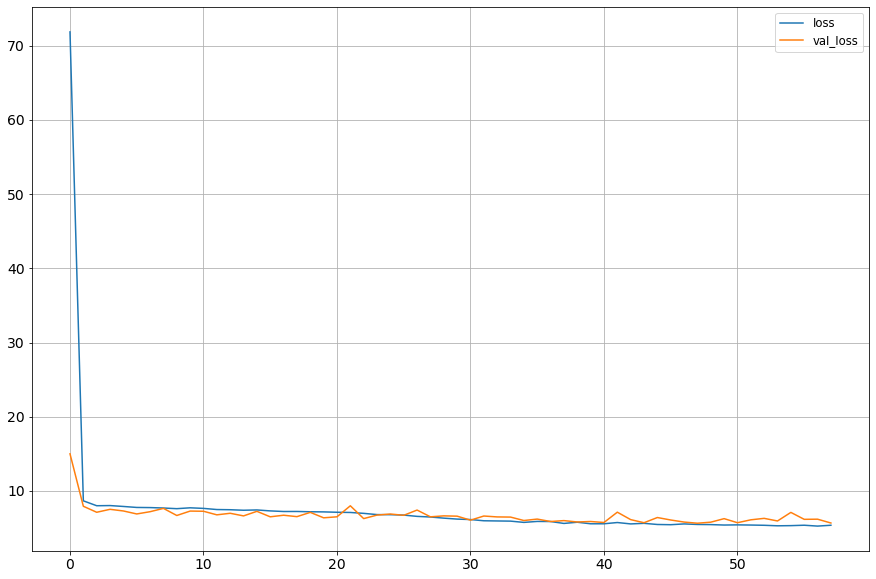

In [196]:
pd.DataFrame(history.history).plot(figsize= (15, 10)) 
plt.grid(True) 
 # set the vertical range to [0-1]



In [193]:
y_pred = model.predict(X_test_window)

In [192]:
model_loss = model.evaluate(X_test_window, y_test_window, batch_size=32)
model_loss

23/23 [==============================] - 0s 4ms/step - loss: 5.5209


5.52089786529541

In [138]:
np.mean(keras.metrics.MAPE(y_test_window.reshape(-1,10),y_pred))

5.8671637

In [131]:
X_test_window.shape

(720, 54, 1)

In [60]:
y_pred[:10]

array([[399733.94, 389930.78, 387920.7 , 379564.12, 377465.56, 372264.03,
        376124.25, 384357.06, 371308.12, 370025.94],
       [394563.72, 390883.  , 385794.16, 379971.25, 378693.22, 374221.5 ,
        376068.47, 381360.44, 369463.34, 368134.56],
       [394067.84, 387253.7 , 388069.72, 381496.25, 384657.62, 376182.6 ,
        373431.28, 380216.06, 369580.97, 371680.16],
       [389905.97, 388827.3 , 386774.38, 386366.25, 385593.6 , 374930.6 ,
        370077.9 , 376666.9 , 373360.3 , 373334.56],
       [391113.8 , 388354.1 , 390560.06, 385226.66, 382993.03, 372842.34,
        372815.94, 380460.38, 374302.53, 379214.75],
       [393107.84, 396325.97, 393780.03, 383719.7 , 380416.25, 372158.4 ,
        376437.22, 378752.5 , 379772.6 , 386796.9 ],
       [396491.88, 392924.34, 387718.06, 379031.78, 378314.38, 375429.9 ,
        376326.5 , 384332.5 , 384369.97, 390642.06],
       [394323.34, 384908.66, 385633.4 , 376399.3 , 382885.38, 374015.16,
        377483.5 , 390350.53, 391878.

In [88]:
y_test_dates[-1], y_test_dates[79+80*2]

(array([['2012-08-24T00:00:00.000000000'],
        ['2012-08-31T00:00:00.000000000'],
        ['2012-09-07T00:00:00.000000000'],
        ['2012-09-14T00:00:00.000000000'],
        ['2012-09-21T00:00:00.000000000'],
        ['2012-09-28T00:00:00.000000000'],
        ['2012-10-05T00:00:00.000000000'],
        ['2012-10-12T00:00:00.000000000'],
        ['2012-10-19T00:00:00.000000000'],
        ['2012-10-26T00:00:00.000000000']], dtype='datetime64[ns]'),
 array([['2012-08-24T00:00:00.000000000'],
        ['2012-08-31T00:00:00.000000000'],
        ['2012-09-07T00:00:00.000000000'],
        ['2012-09-14T00:00:00.000000000'],
        ['2012-09-21T00:00:00.000000000'],
        ['2012-09-28T00:00:00.000000000'],
        ['2012-10-05T00:00:00.000000000'],
        ['2012-10-12T00:00:00.000000000'],
        ['2012-10-19T00:00:00.000000000'],
        ['2012-10-26T00:00:00.000000000']], dtype='datetime64[ns]'))

In [106]:
np.sum(y_pred[0::80], axis=0)

array([8356300.5, 8112218.5, 8136195. , 8010957.5, 8069879. , 8003122.5,
       8061131.5, 8307565. , 8115702.5, 8111578.5], dtype=float32)

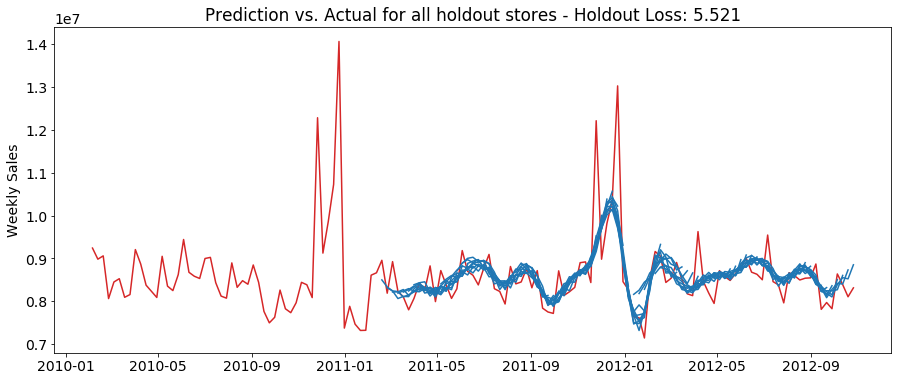

In [194]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(piv_test.sum(axis=1), label='actual', color='tab:red')

for i in range(0,80):
    ax.plot(y_test_dates.reshape(-1,10)[i], np.sum(y_pred[i::80], axis=0), label=f'prediction {i}', color='tab:blue')
# for i in range(6):
#     ax.plot(y_train_dates.reshape(-1,10)[i], y_pred[i], label=f'prediction {i}', color='tab:blue')
#     print(y_pred[0][i])
# ax.plot(piv_train.iloc[:,2], label='actual', color='tab:blue')


# ax.plot(y_test_dates.reshape(-1,10)[79], y_test_window.reshape(-1,10)[79::80].sum(axis=0), label='actual')
# ax.plot(y_test_window.index, y_test_window, 'r.-', label='actual')
# ax.legend()
ax.set_title(f'Prediction vs. Actual for all holdout stores - Holdout Loss: {model_loss:.3f}')
ax.set_ylabel('Weekly Sales');

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: More than 20 figures have been opened. Figures creat

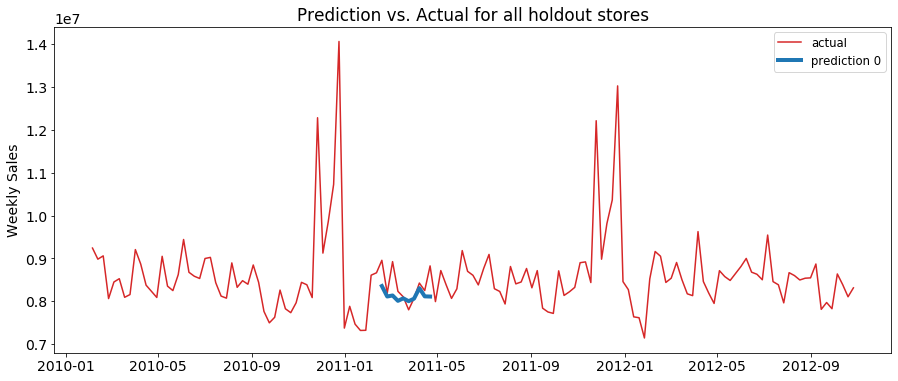

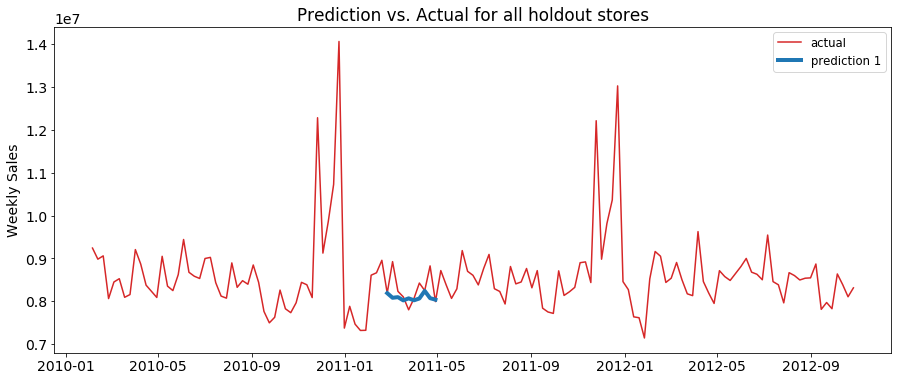

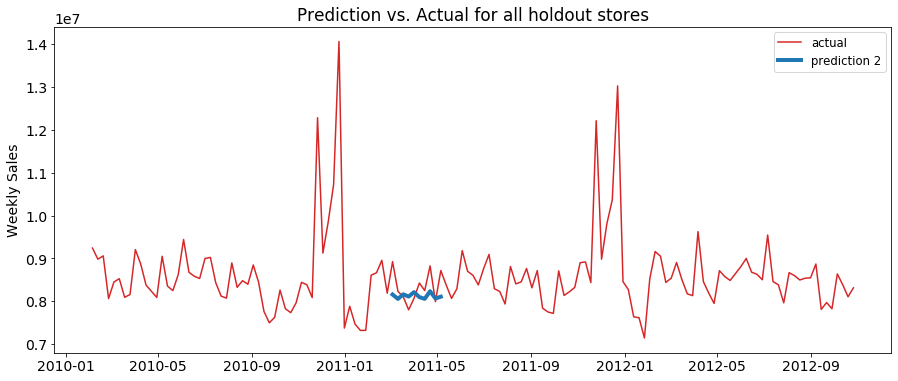

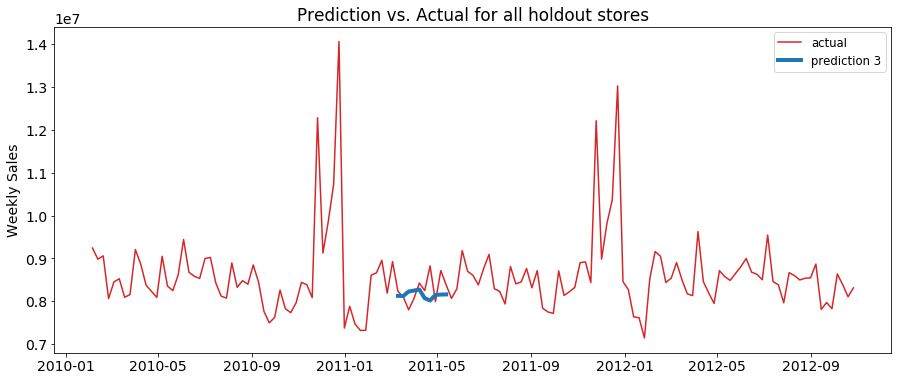

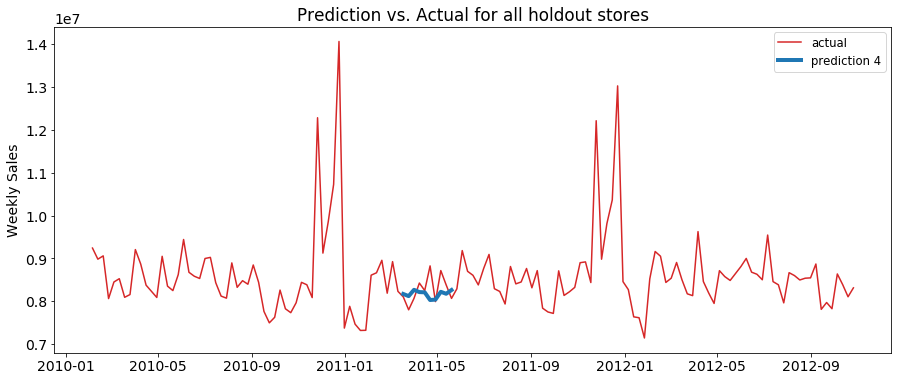

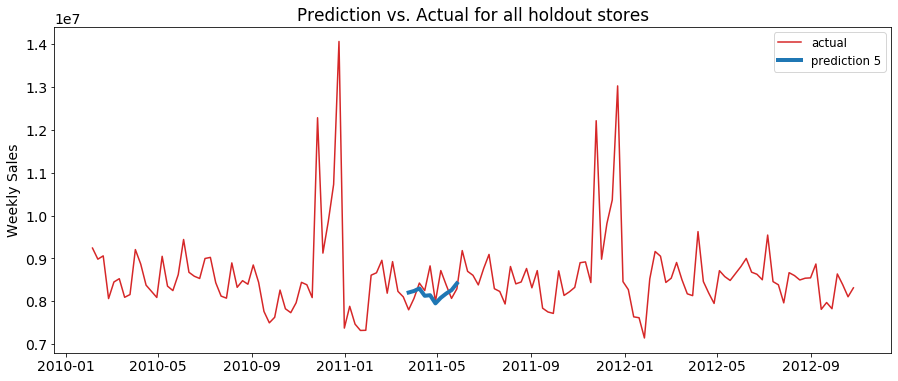

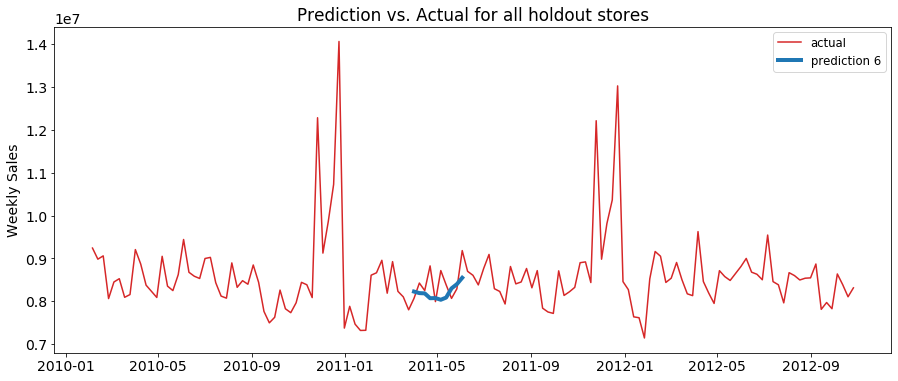

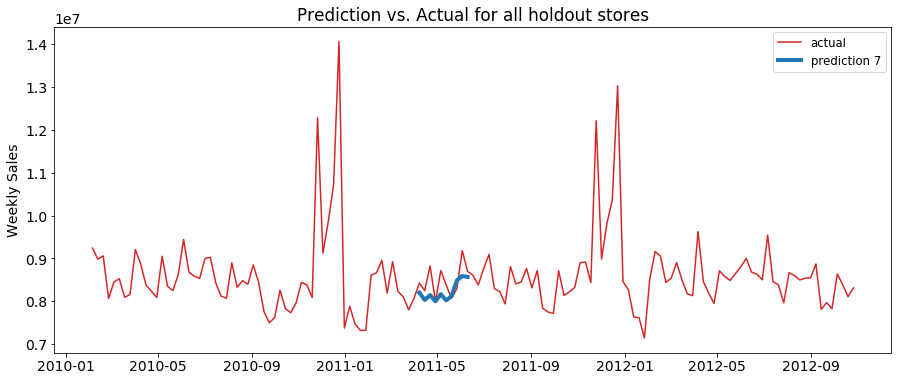

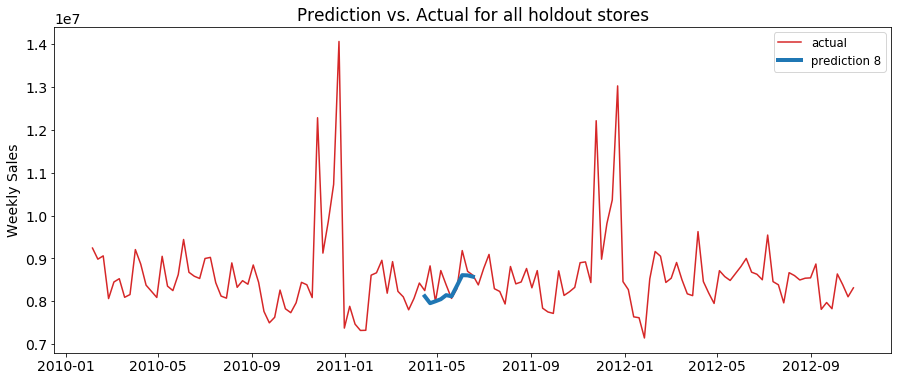

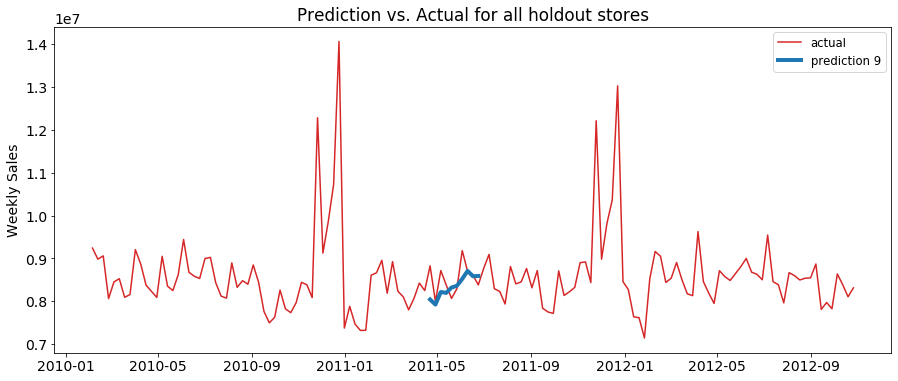

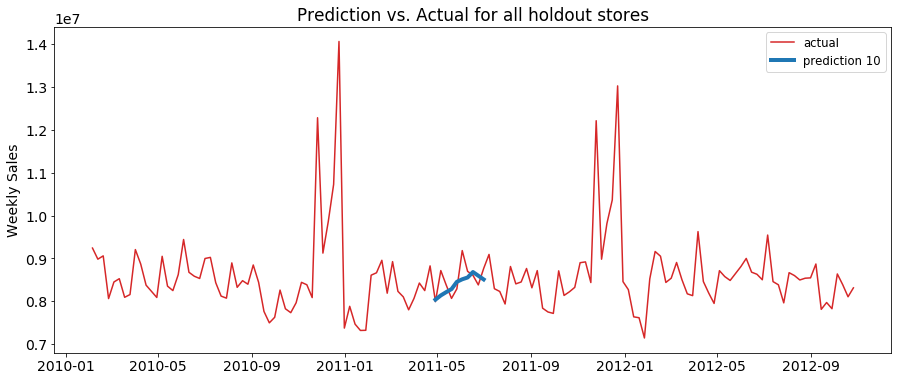

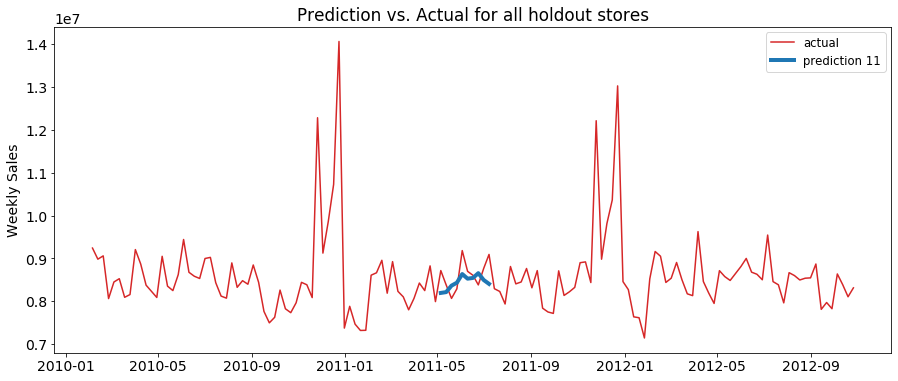

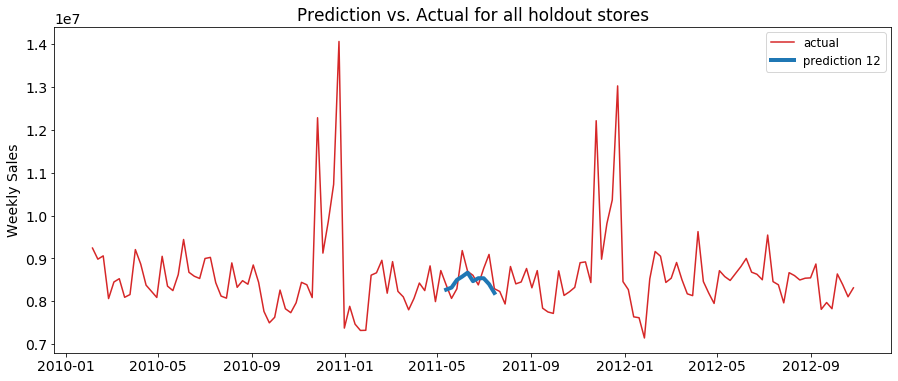

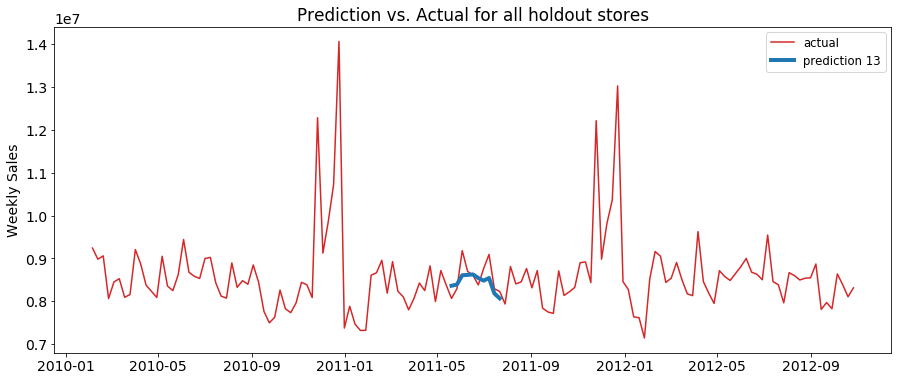

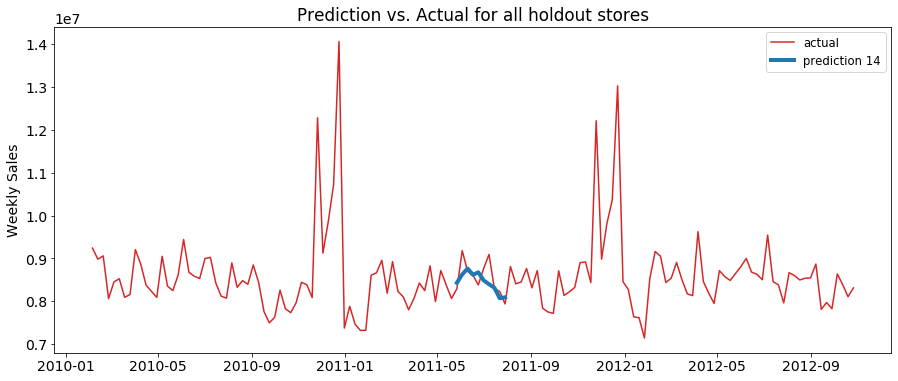

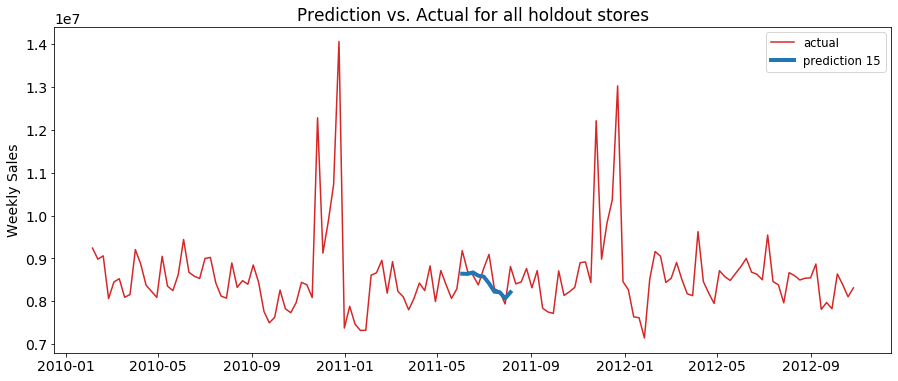

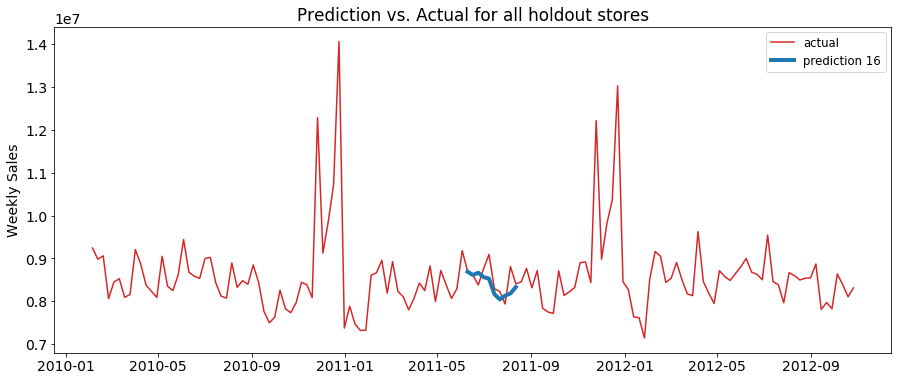

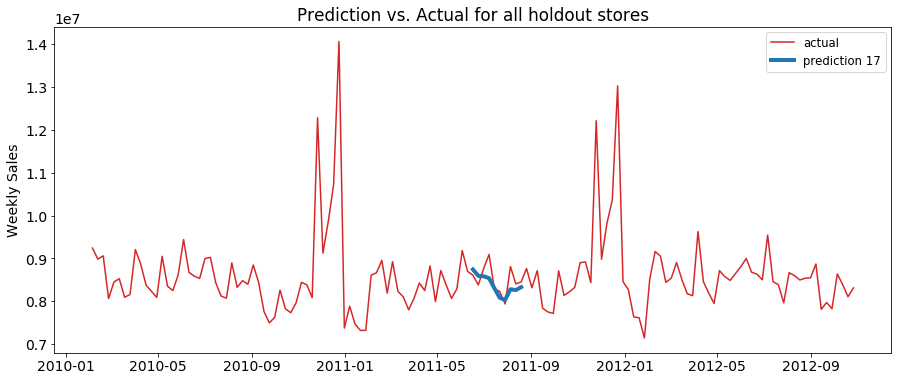

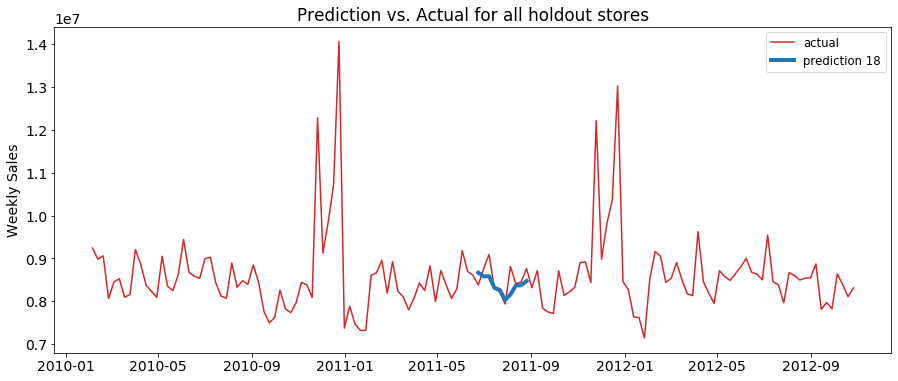

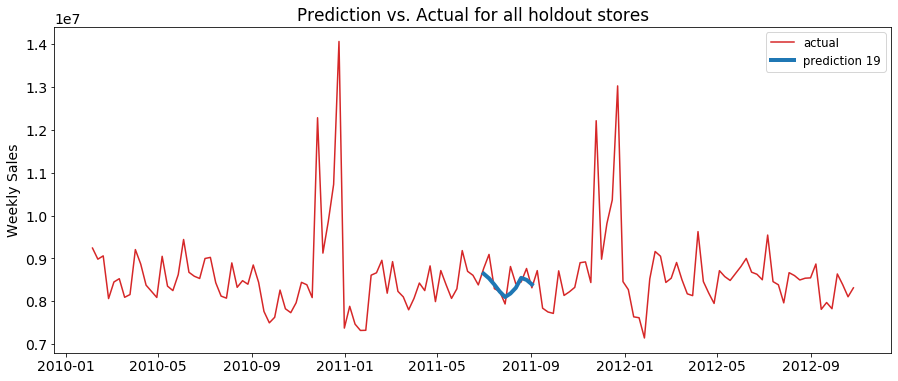

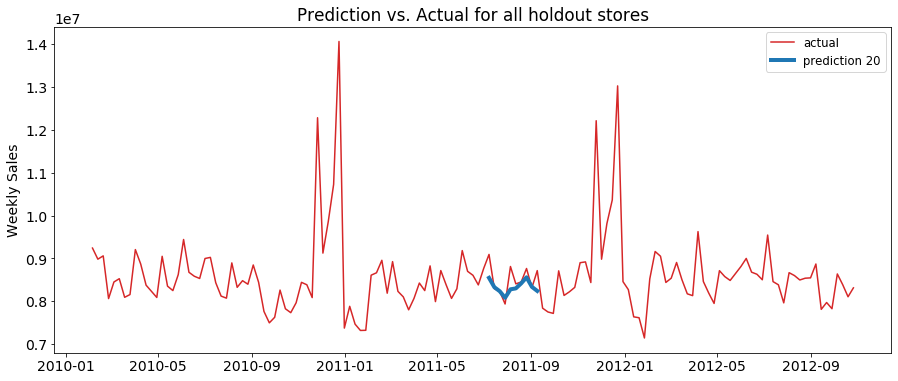

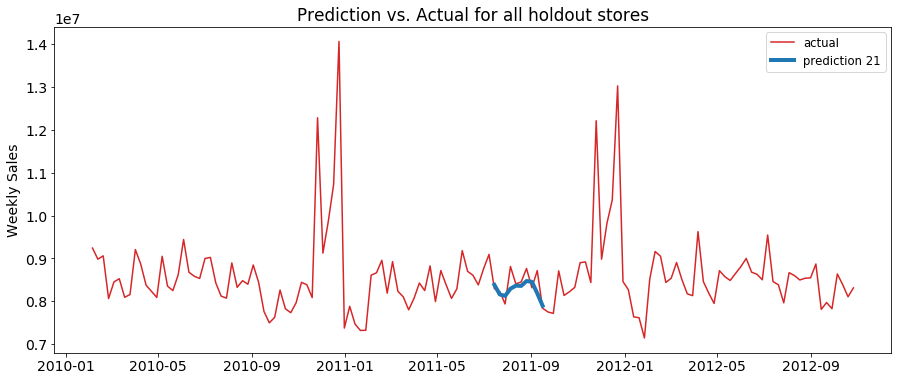

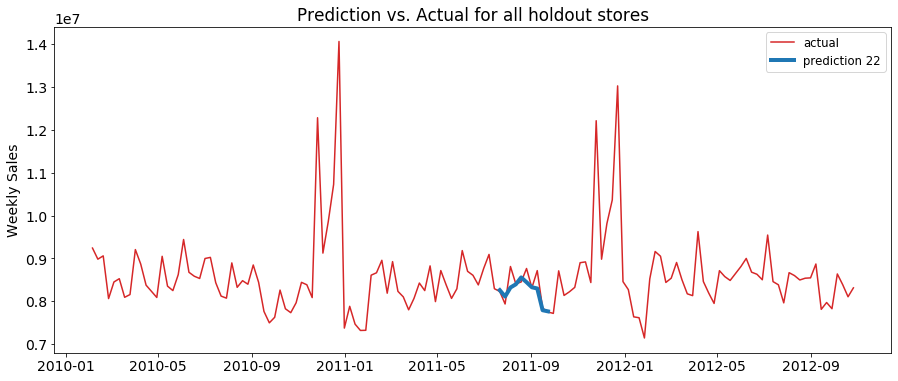

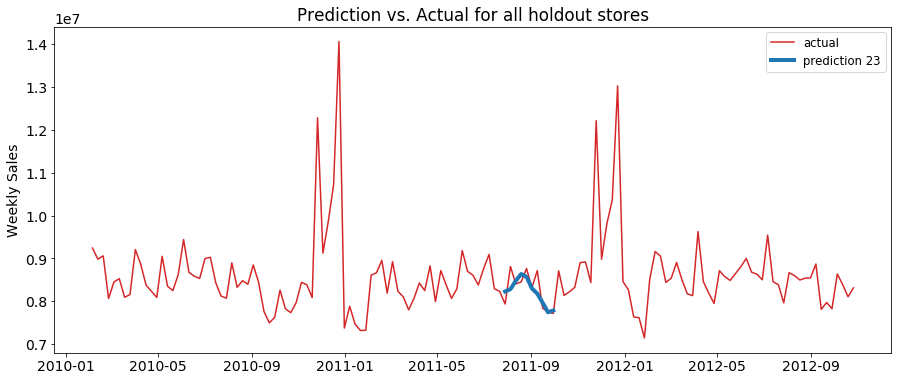

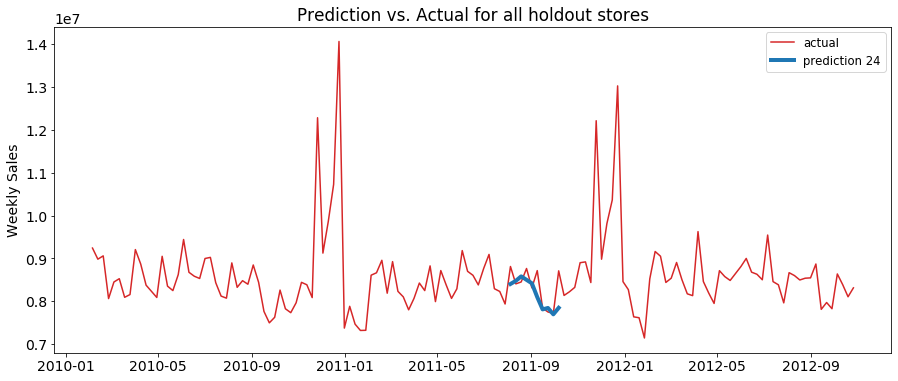

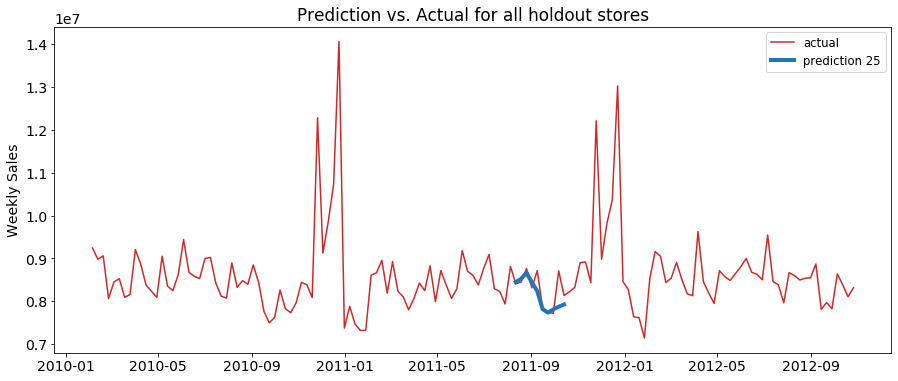

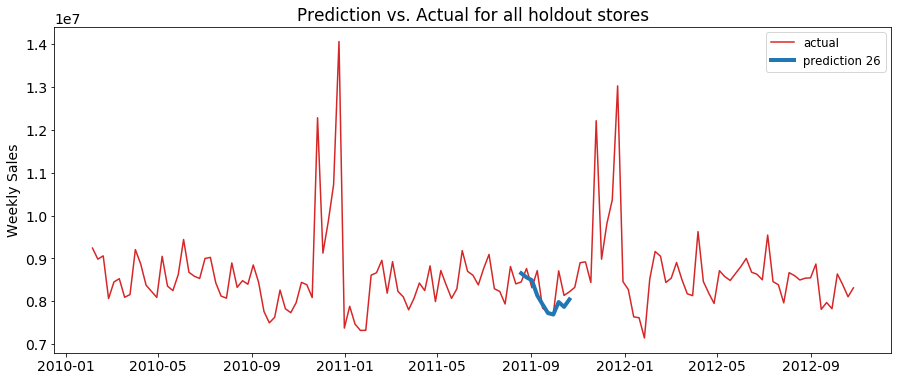

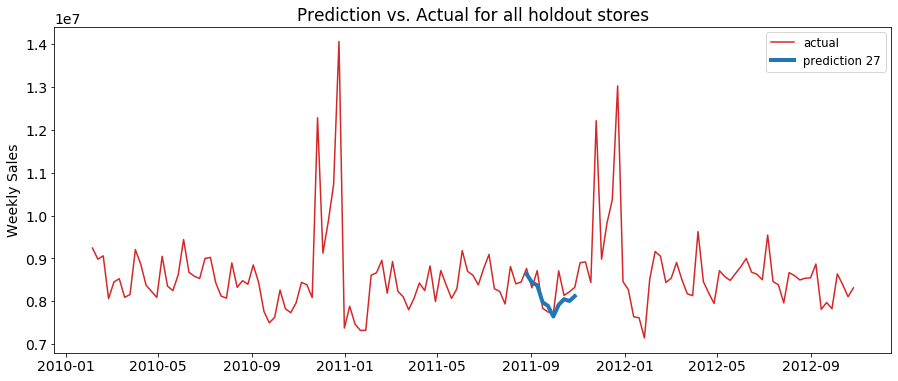

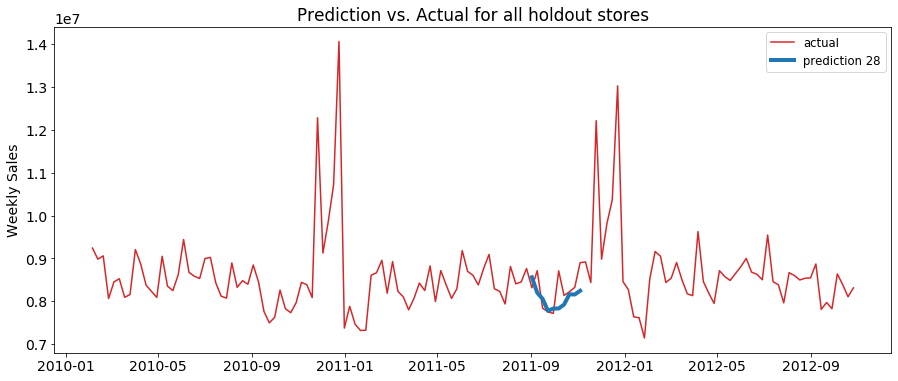

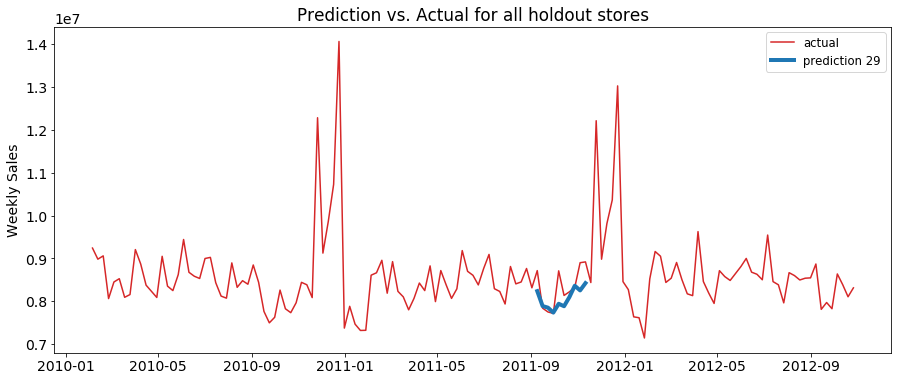

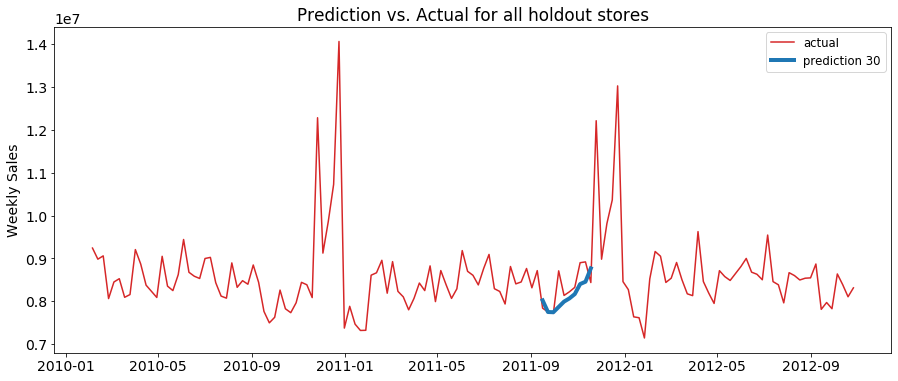

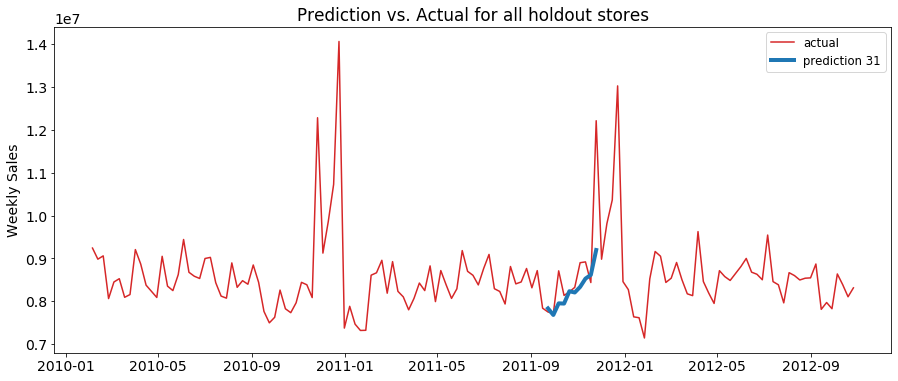

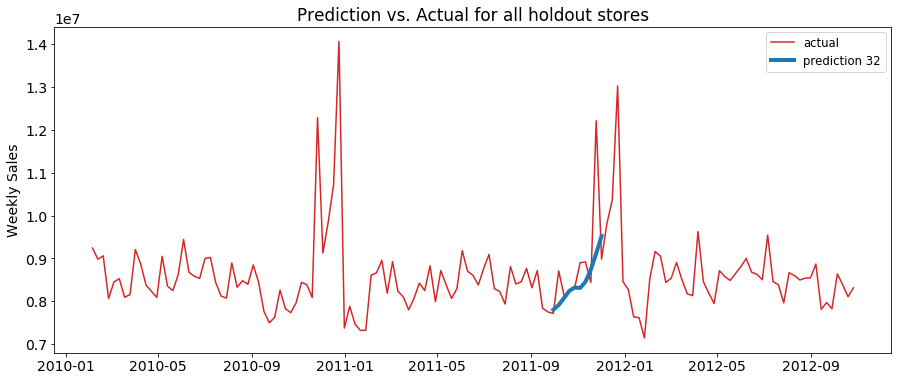

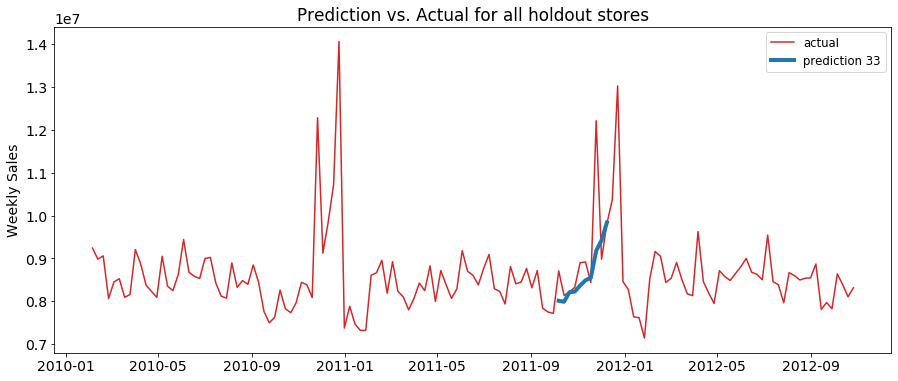

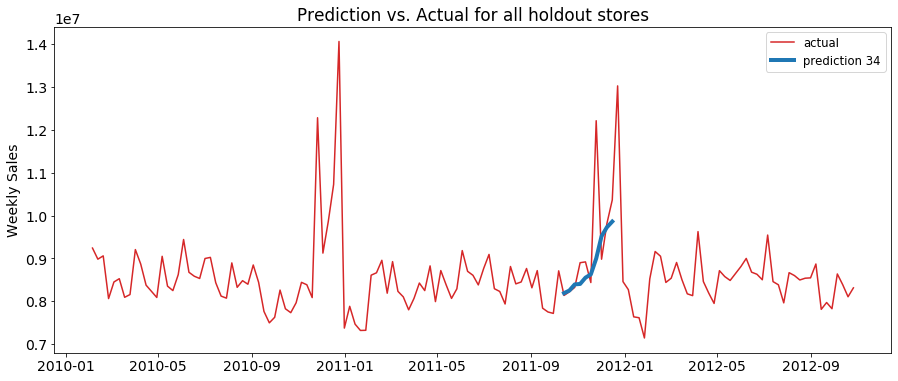

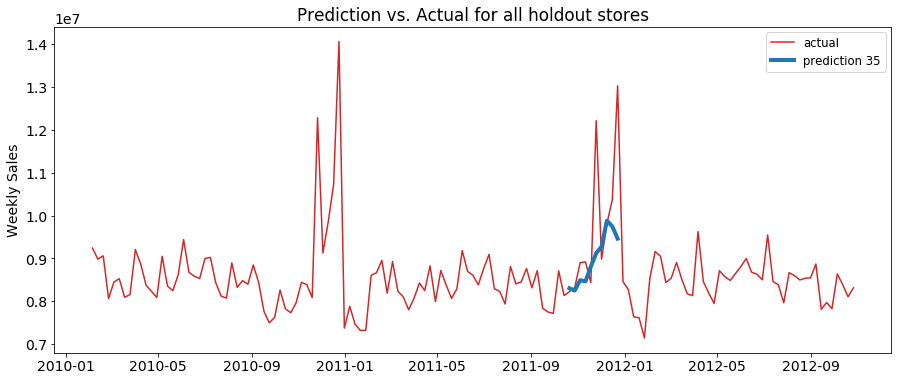

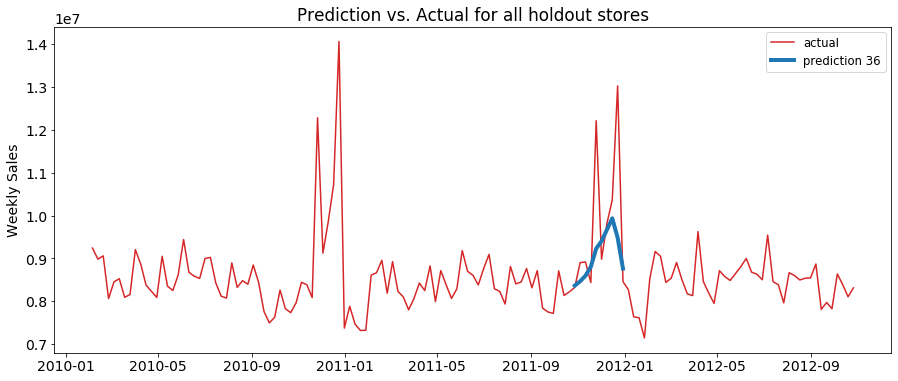

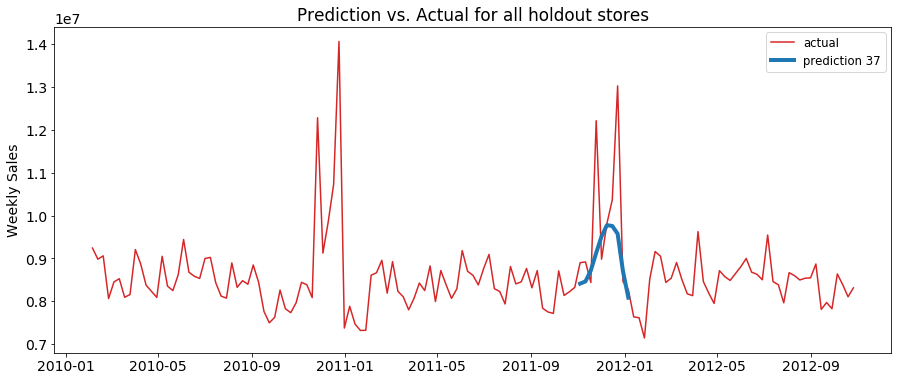

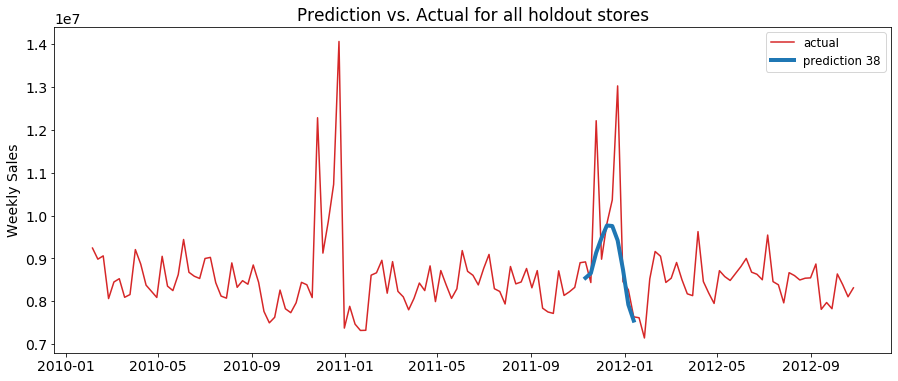

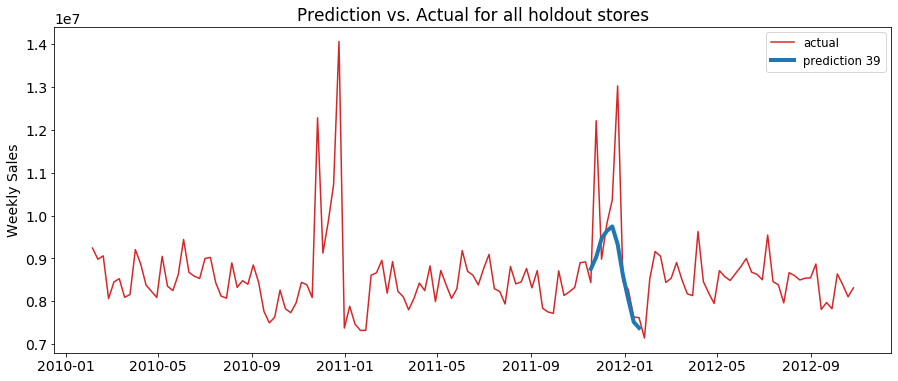

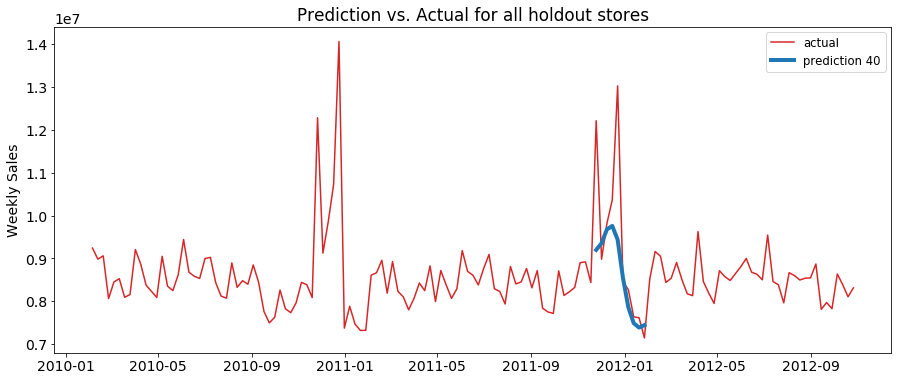

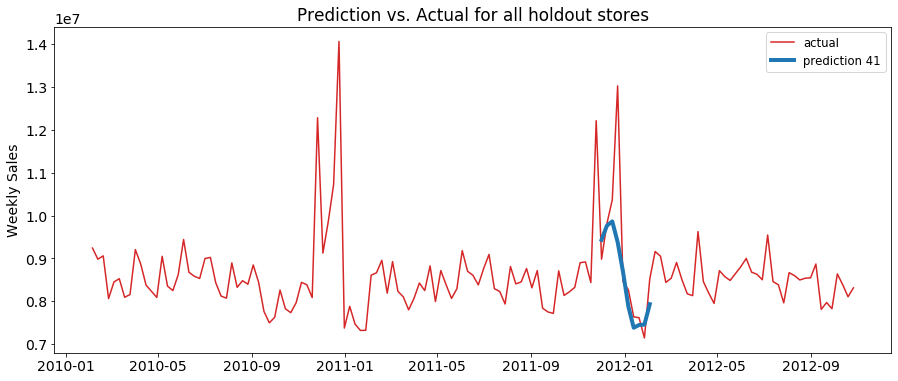

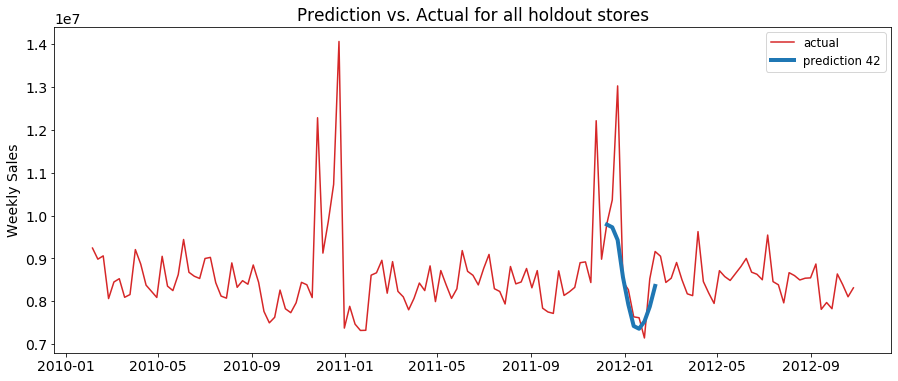

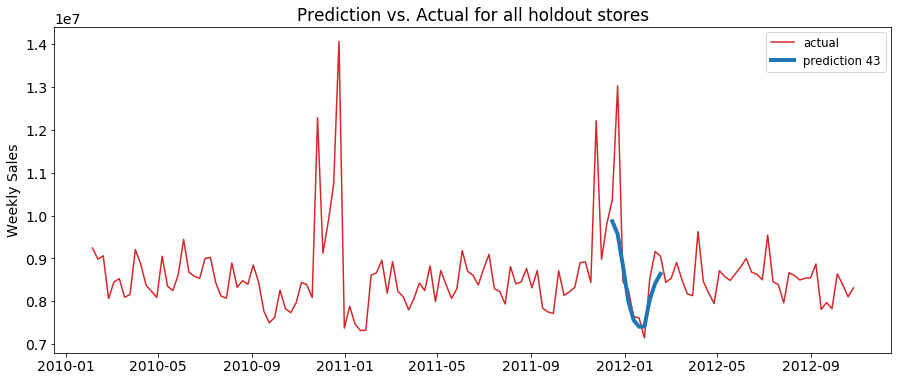

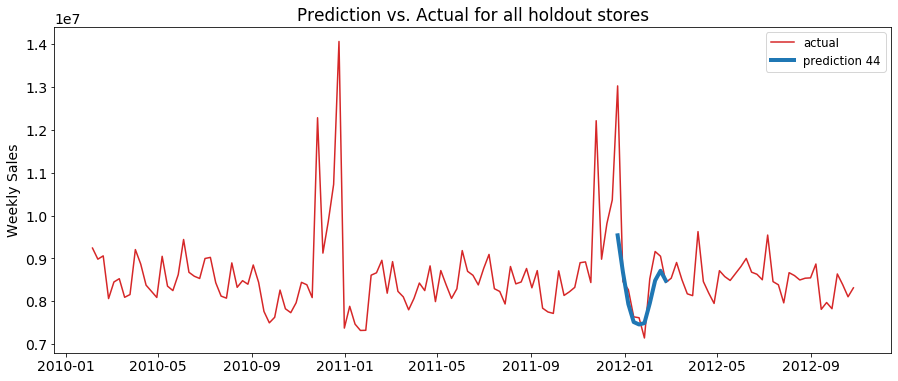

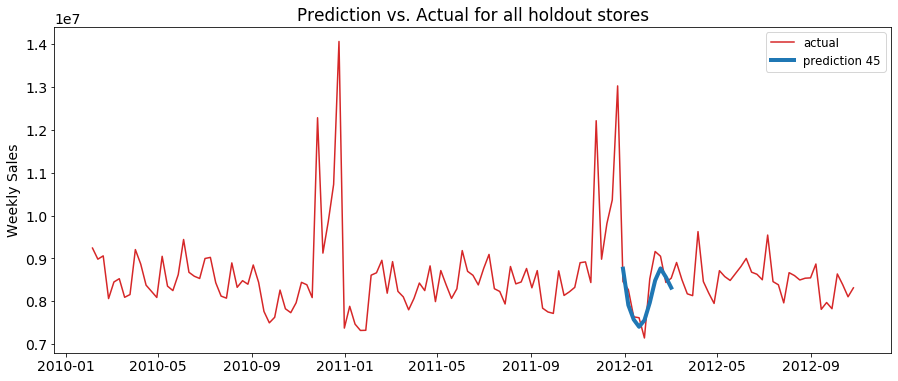

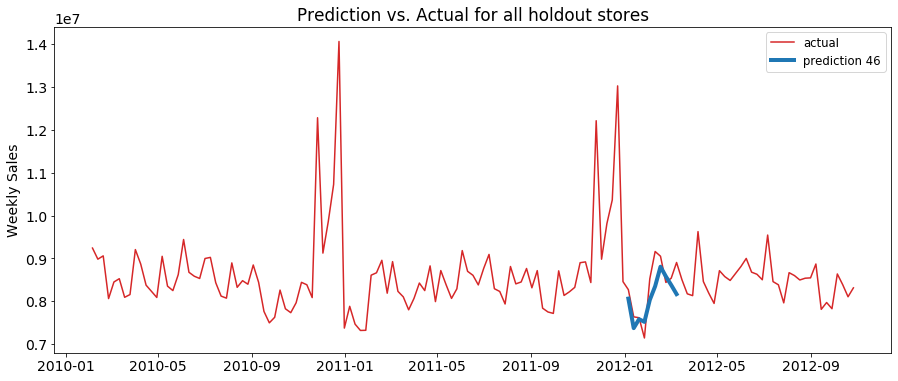

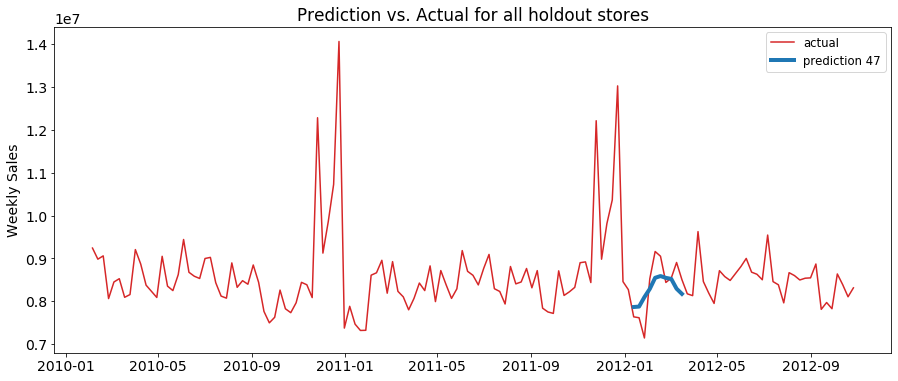

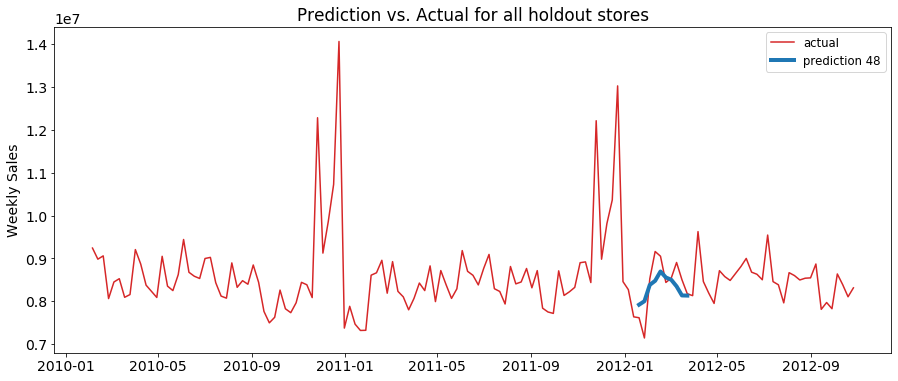

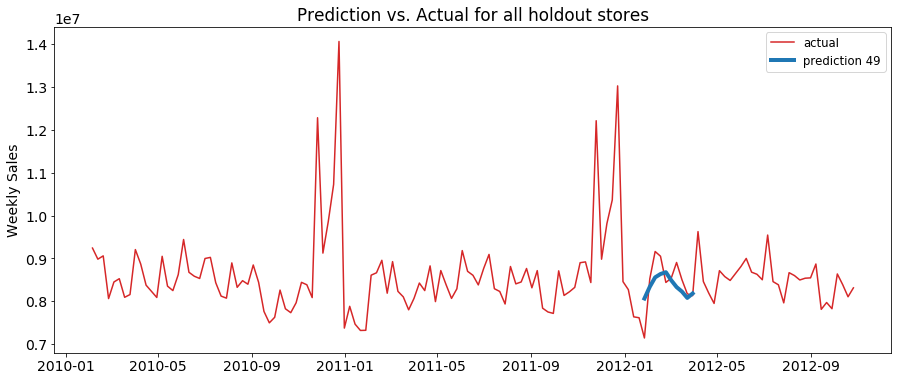

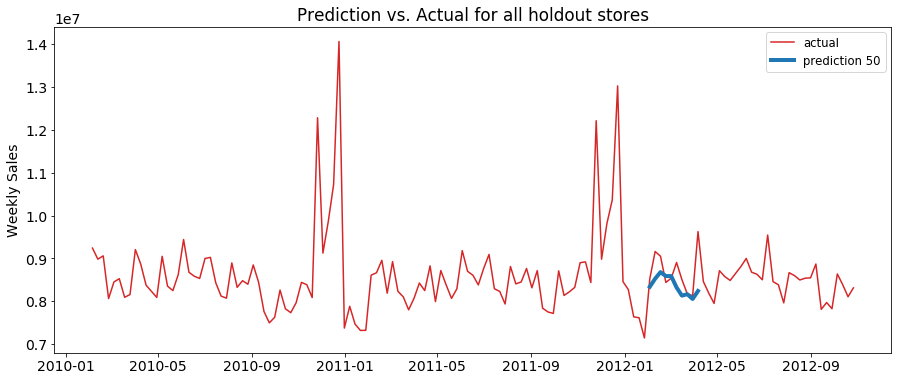

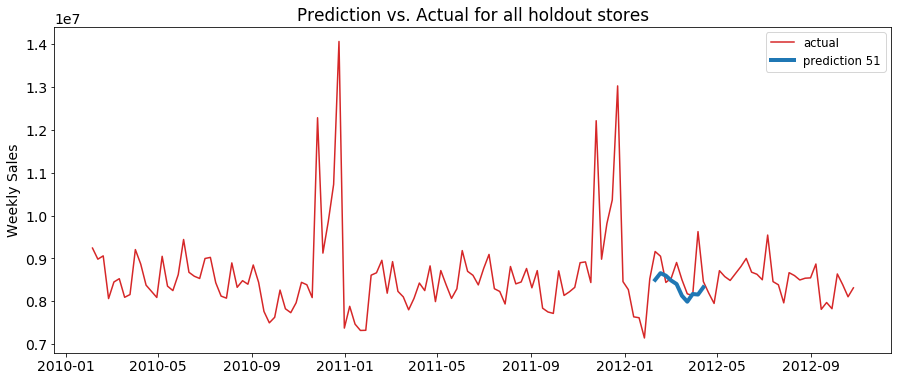

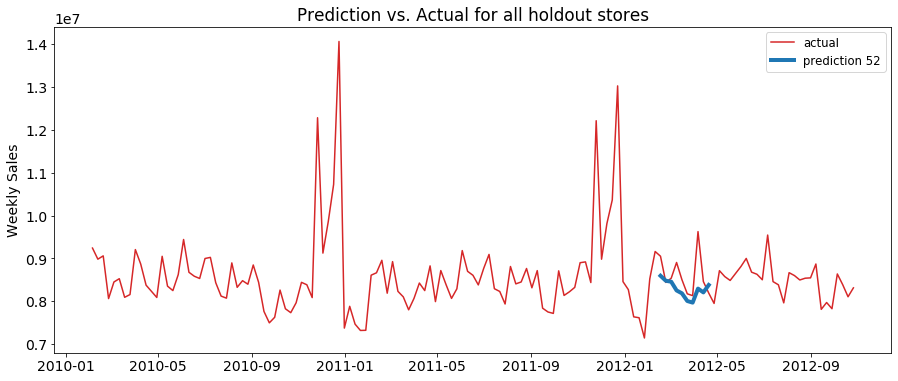

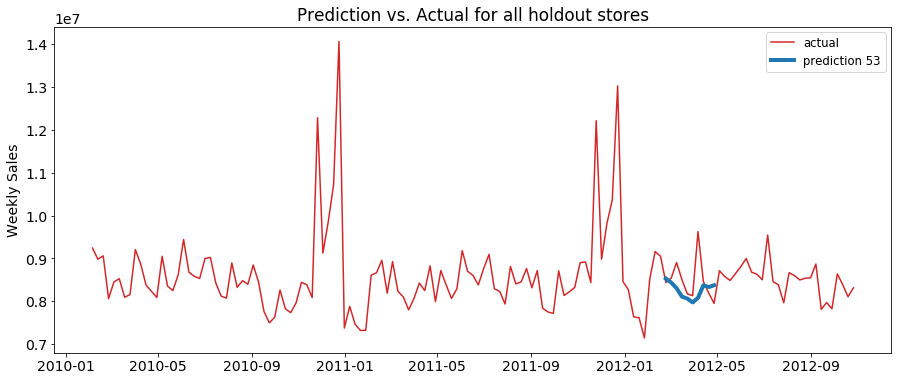

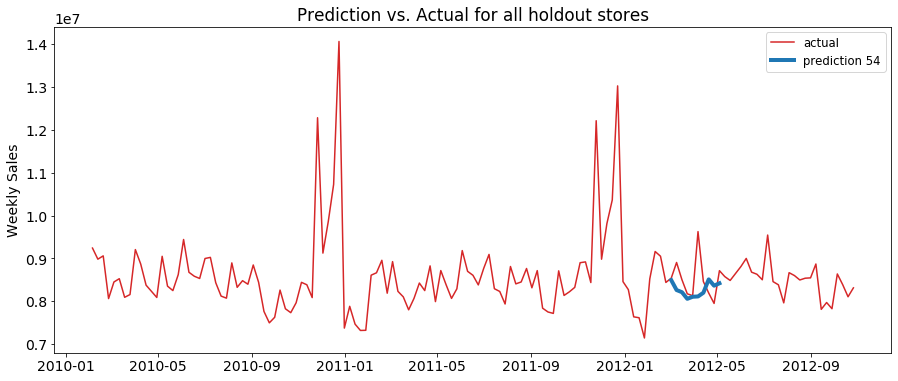

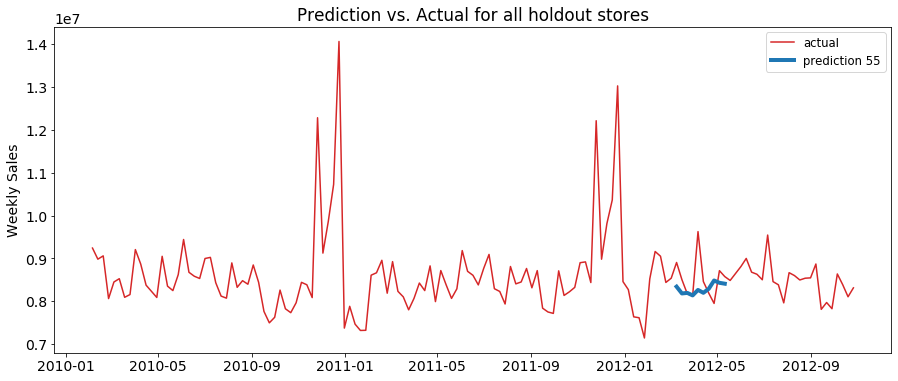

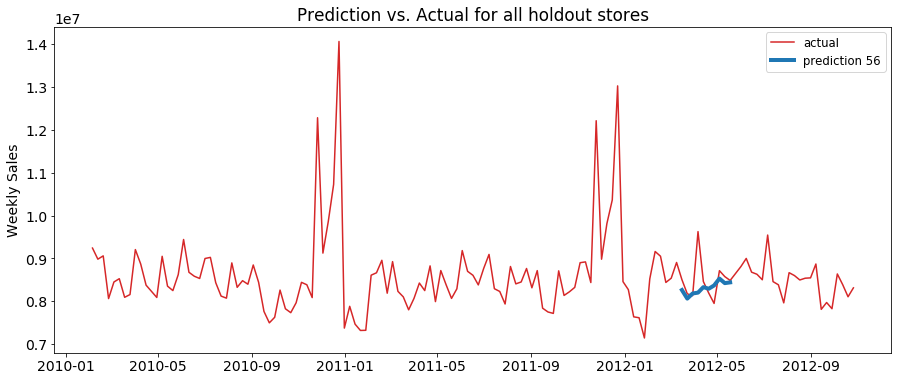

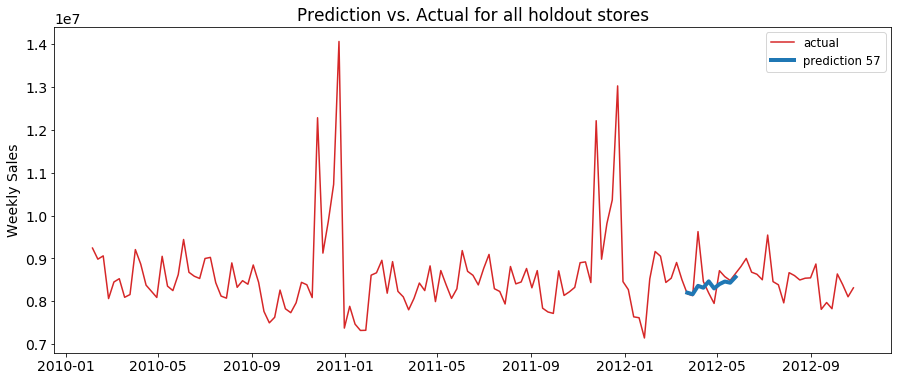

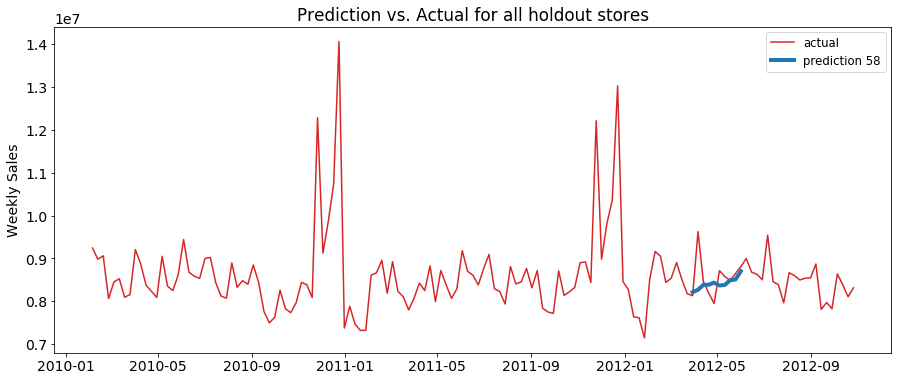

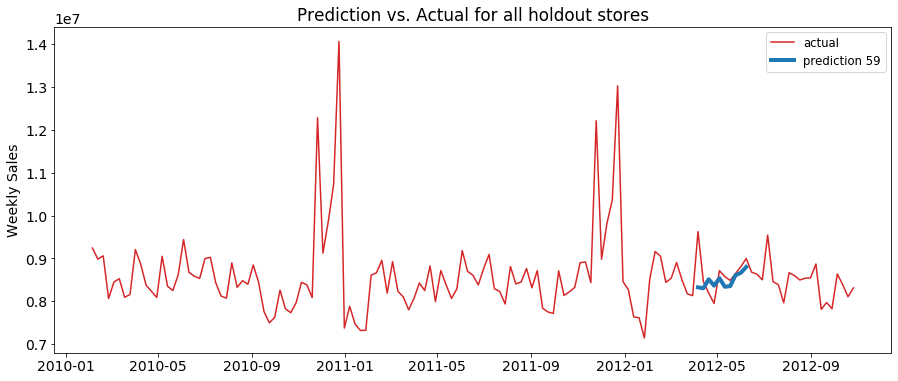

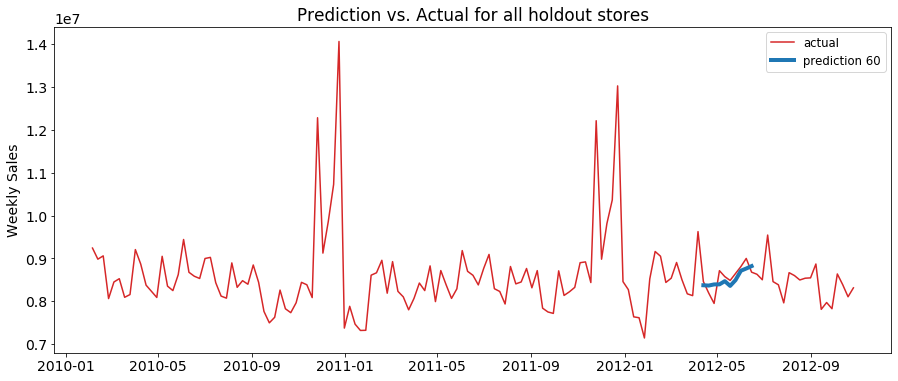

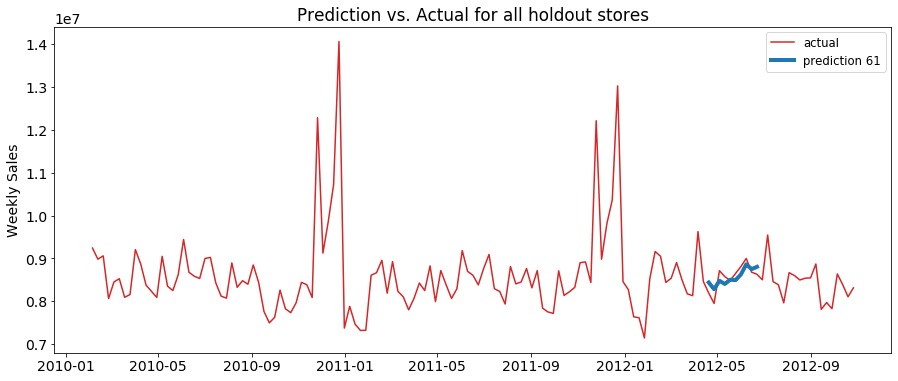

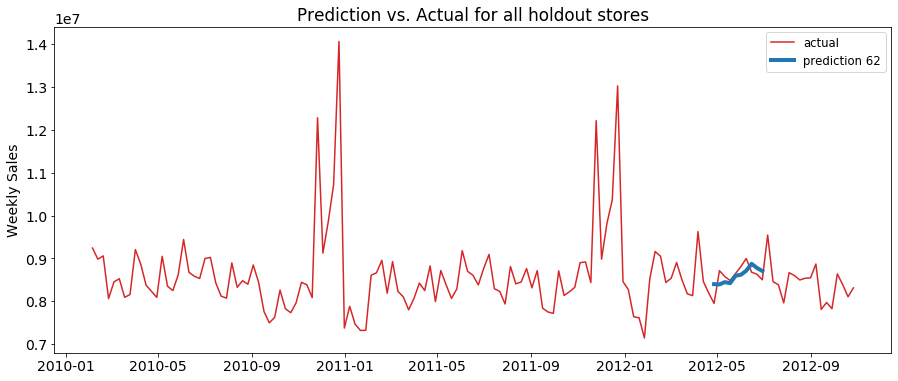

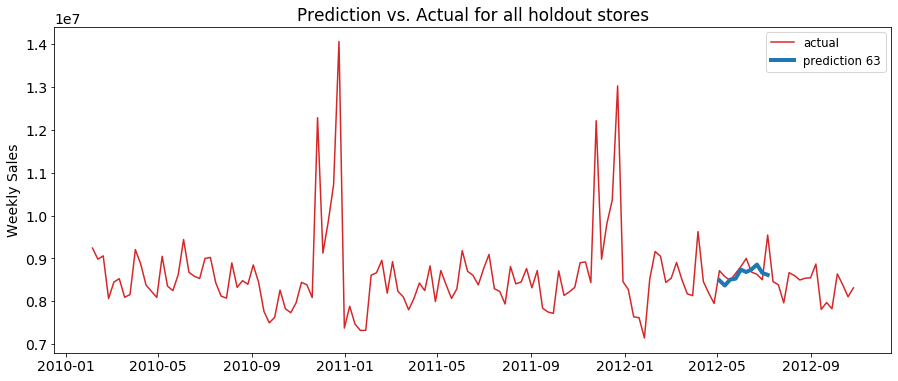

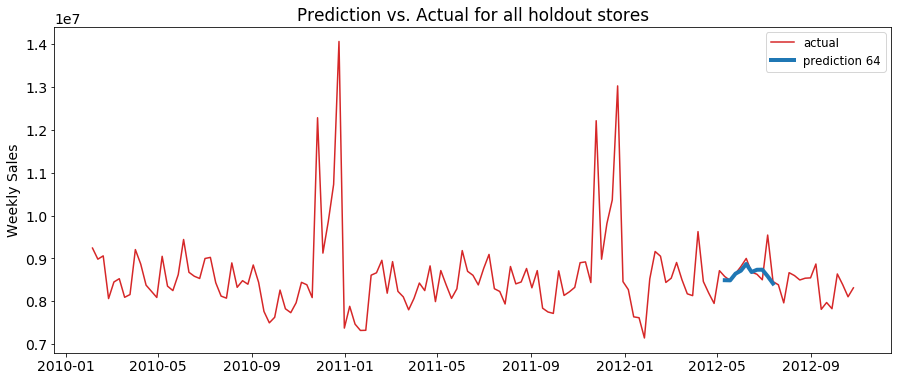

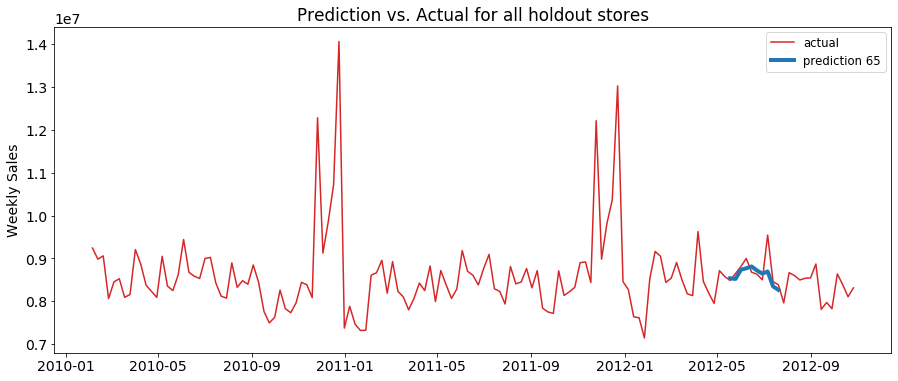

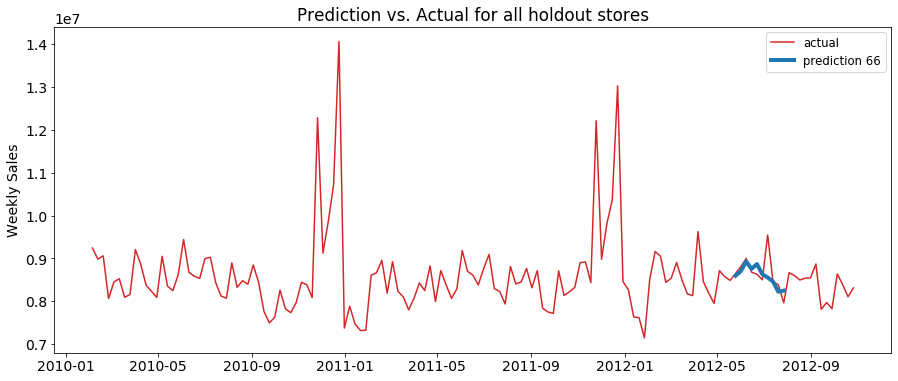

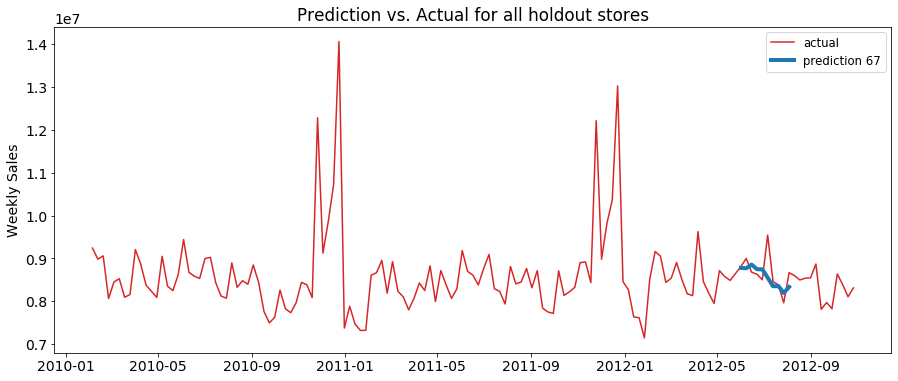

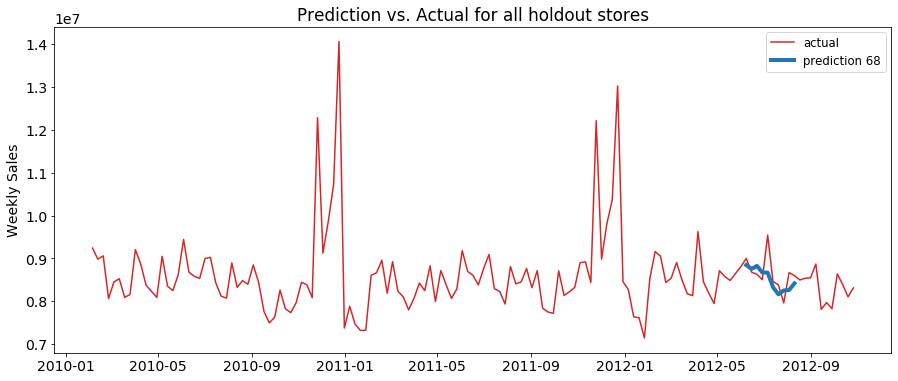

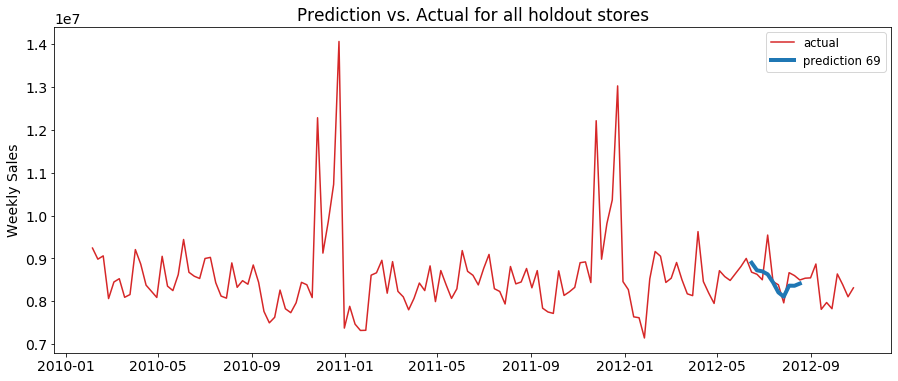

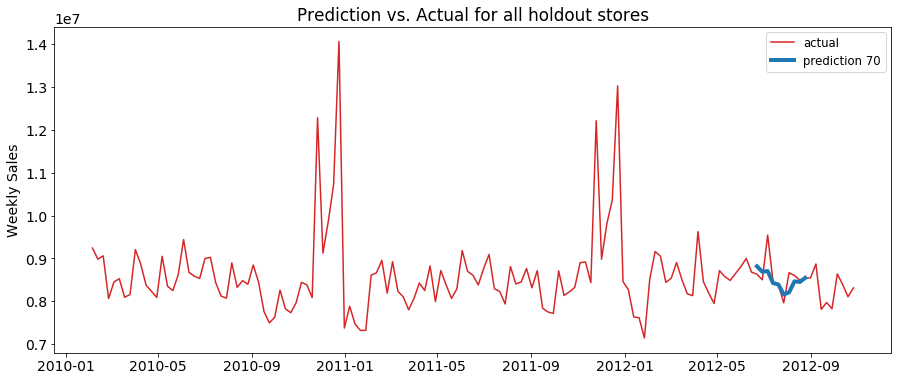

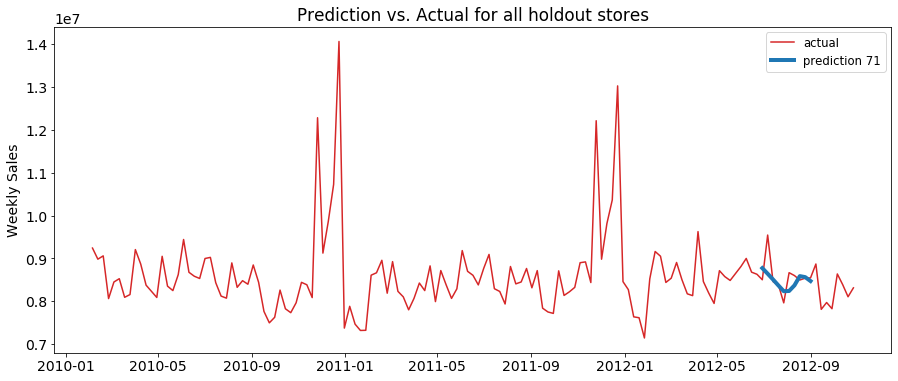

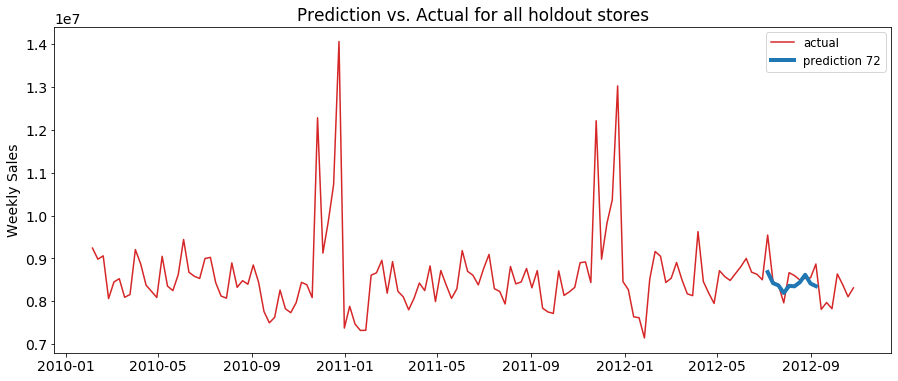

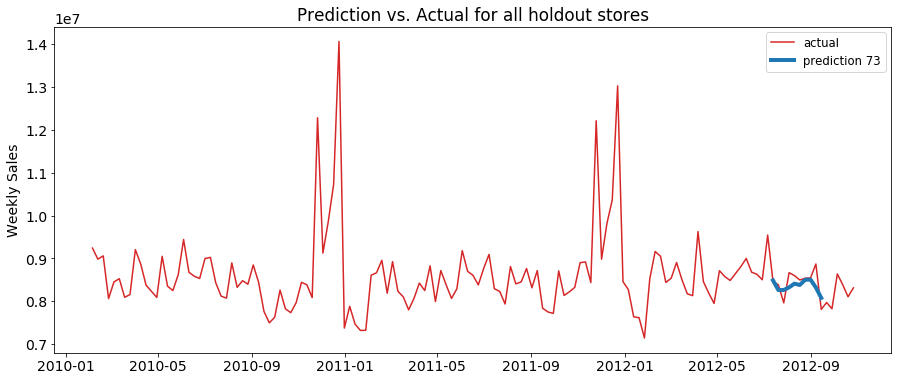

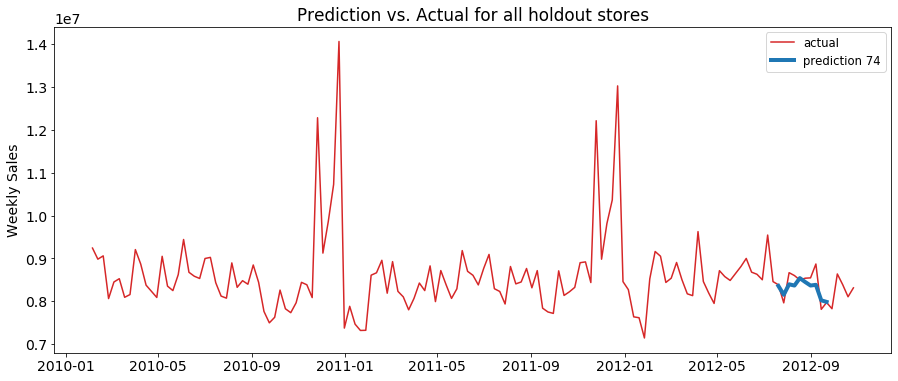

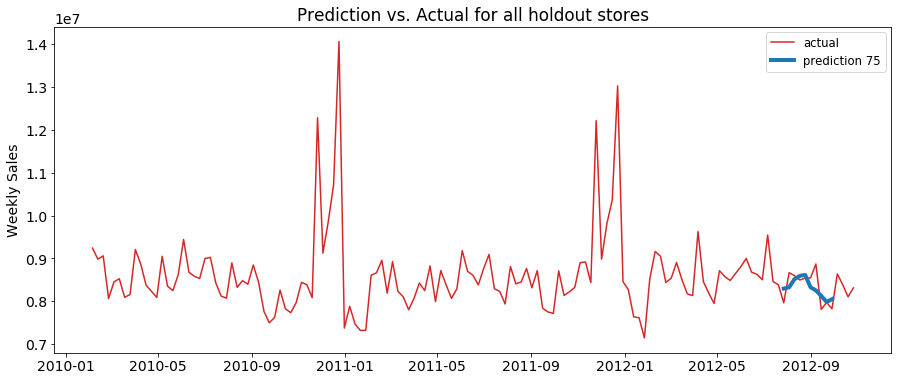

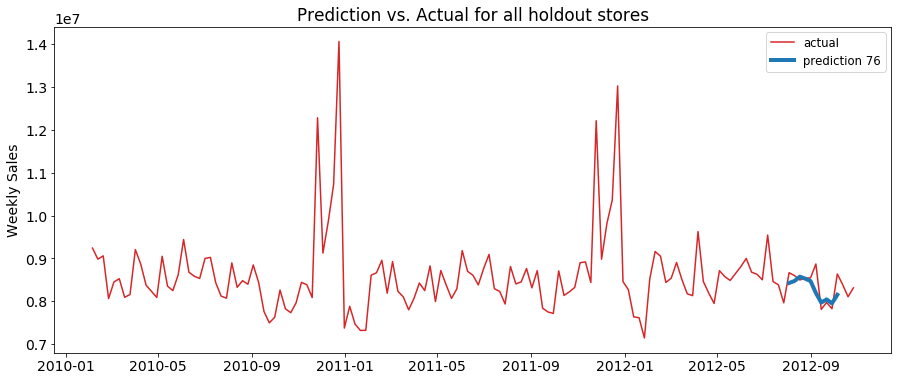

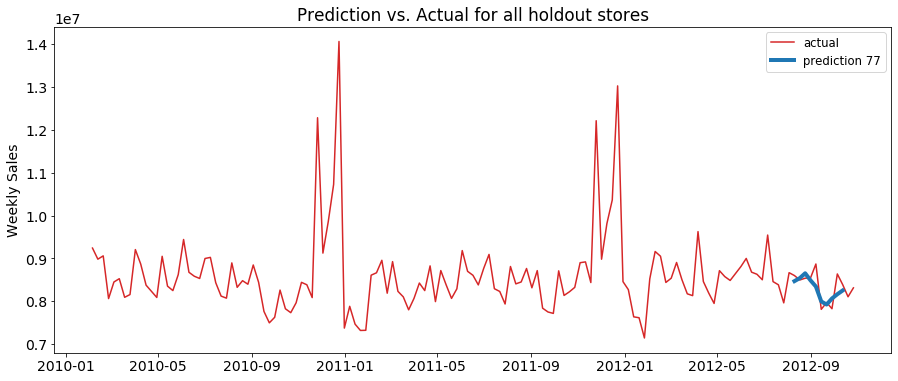

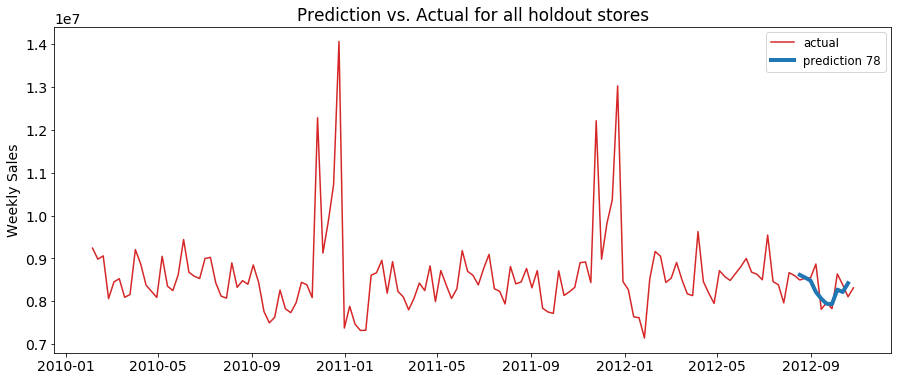

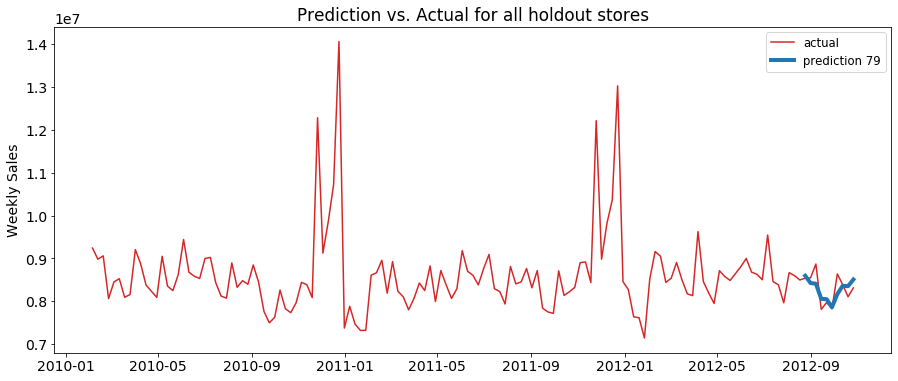

In [166]:
for i in range(80):
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(piv_test.sum(axis=1), label='actual', color='tab:red')
    ax.plot(y_test_dates.reshape(-1,10)[i], np.sum(y_pred[i::80], axis=0), label=f'prediction {i}', color='tab:blue', lw=4)

    ax.set_title('Prediction vs. Actual for all holdout stores')
    ax.set_ylabel('Weekly Sales')
    ax.legend()
#     plt.savefig(f'../images/gif/rolling_prediction_{i:02}.jpg', dpi=300);

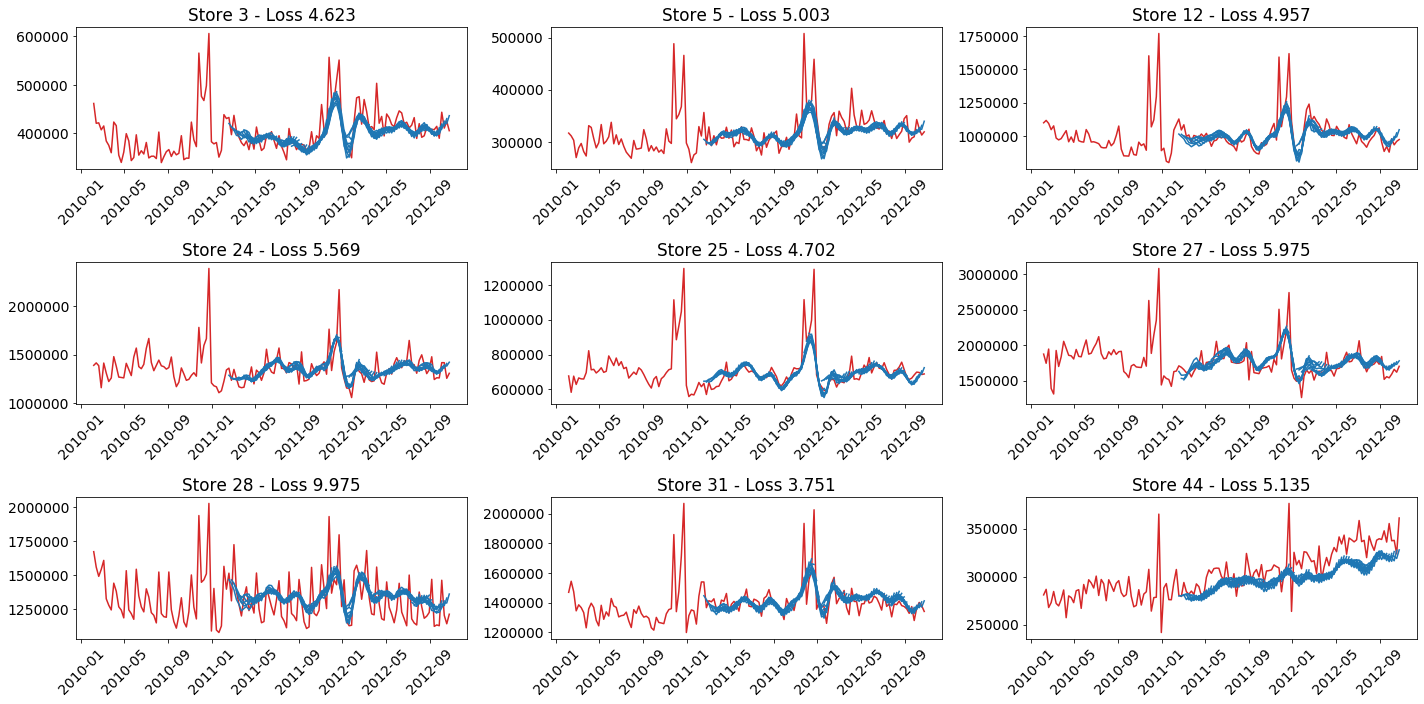

In [195]:
store_arr = piv_test.columns.tolist()

fig, axs = plt.subplots(3,3, figsize=(20,10))

ncols = piv_test.shape[1]
n_pred = len(piv_test) - n_prev - n_future +1
# print(n_pred)
# start = i * n_pred
# stop = start + n_pred
loss=keras.metrics.MAPE(y_test_window.reshape(-1,10),y_pred)
for (i, store), ax in zip(enumerate(store_arr), axs.flatten()):
    ax.plot(piv_test.iloc[:,i], label='actual', color='tab:red')
    store_loss = np.mean(loss[i*n_pred:i*n_pred+n_pred])
    for j in range(0,n_pred):
        idx = i * n_pred +j
        
        ax.plot(y_train_dates.reshape(-1,10)[idx], y_pred[idx], label=f'prediction {idx}', color='tab:blue')
        ax.set_title(f'Store {store} - Loss {store_loss:.3f}')
        ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()


In [65]:
piv_test.columns.tolist()

[3, 5, 12, 24, 25, 27, 28, 31, 44]

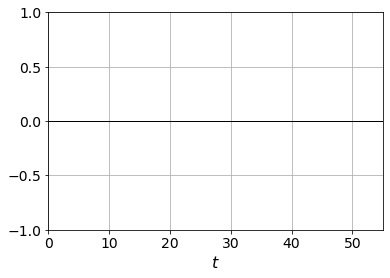

In [114]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_prev, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_prev, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_prev + 1, -1, 1])


plot_series(X_train_window[col, :, 0], y_train_window[col, 0],
                y_label=("$x(t)$" if col==0 else None))

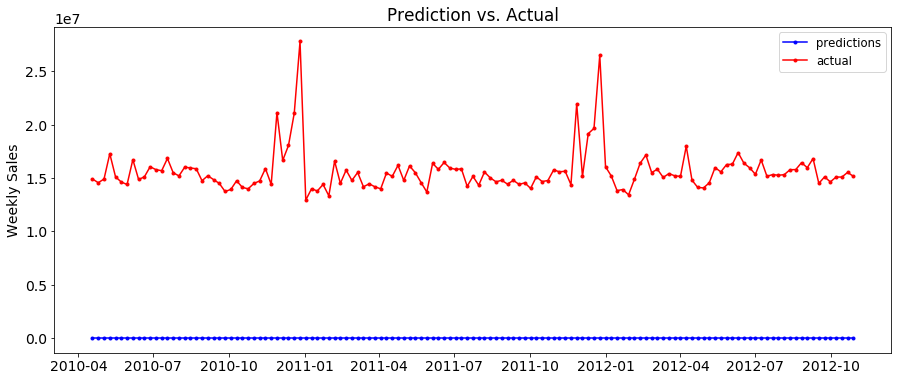

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(y_test_window.index, y_pred, 'b.-', label='predictions')
ax.plot(y_test_window.index, y_test_window, 'r.-', label='actual')
ax.legend()
ax.set_title('Prediction vs. Actual')
ax.set_ylabel('Weekly Sales');

In [ ]:
y_pred

In [18]:
X_test_window

array([[[16949557.13000003],
        [15527423.02000002],
        [14904971.82999999],
        ...,
        [14034991.80999999],
        [16483324.48      ],
        [15761521.46999999]],

       [[15527423.02000002],
        [14904971.82999999],
        [14857999.26999999],
        ...,
        [16483324.48      ],
        [15761521.46999999],
        [14906580.86      ]],

       [[14904971.82999999],
        [14857999.26999999],
        [15453439.02999999],
        ...,
        [15761521.46999999],
        [14906580.86      ],
        [14555150.93000003]],

       ...,

       [[15310966.89999999],
        [15771052.76000002],
        [15789121.06999999],
        ...,
        [15101210.08000001],
        [14635362.29999998],
        [15089821.07      ]],

       [[15771052.76000002],
        [15789121.06999999],
        [16433747.40999999],
        ...,
        [14635362.29999998],
        [15089821.07      ],
        [15084852.99999999]],

       [[15789121.06999999],
        [1643